In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['svg.fonttype']='none'

In [2]:
patient_specific_tumor_genes=pd.read_csv("Revision_plot/tumor_unique_genes.txt",sep="\t",index_col=0)

In [3]:
from sklearn.preprocessing import StandardScaler

standscaler=StandardScaler()

In [5]:
patient_scaled=pd.DataFrame(standscaler.fit_transform(patient_specific_tumor_genes.T),columns=patient_specific_tumor_genes.T.columns)

In [6]:
sample_order=['caiwanqiang','shiyi','lilanying_biopsy','nianshizhu_biopsy','sunzhengyun_biopsy', 'wandeyuan_biopsy',
       'wangzhu_biopsy', 'zhouyunmei_biopsy', 'zhuanglili_biopsy','guozhixing_surgery', 'lilanying_surgery', 'nianshizhu_surgery',
       'sunzhengyun_surgery', 'wandeyuan_surgery', 'wangzhu_surgery',
       'zhouyunmei_surgery', 'zhuanglili_surgery']

In [15]:
import seaborn as sns

In [7]:
patient_scaled.index=patient_specific_tumor_genes.T.index

In [9]:
patient_scaled.loc[sample_order].T.to_csv("source_data/FigureS3C.txt",sep="\t")

<AxesSubplot:>

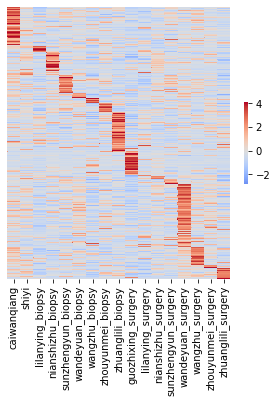

In [71]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sns.heatmap(patient_scaled.loc[sample_order].T,center=0,yticklabels=False,cbar_kws={"shrink": 0.3},cmap='coolwarm')

In [72]:
figure.savefig("revised_svg_figures/patient_specific_gene_B.svg")

In [10]:
###GZMK12
def get_pairs(order,treatment):
    box_pairs=[]
    for group in order:
        box_pairs.append([(group,x) for x in treatment])
    return box_pairs

def get_statistics(path,col):
    count_data=pd.read_csv(path,index_col=0)
    count_data['Group']=count_data['sample'].str.endswith('surgery')*1
    count_data_dict=count_data.groupby('sample').sum()['count'].to_dict()
    count_data['percentage']=count_data.apply(lambda x:x['count']/count_data_dict[x[0]],axis=1)
    count_data['group class']=count_data.apply(lambda x:'Biopsy' if x['Group']==0 else 'Surgery',axis=1)
    cell_type_order=list(count_data[col].value_counts().index)
    treatment=['Biopsy','Surgery']
    box_pairs=get_pairs(cell_type_order,treatment)
    return count_data,box_pairs,cell_type_order

def get_ratio_df(T_cell_subtypes,colnames):
    T_cell_subtypes_pre=[]
    T_cell_subtypes_post=[]
    for index,value in T_cell_subtypes.groupby(colnames):
        key=','.join(index)
        if 'biopsy' in key:
            T_cell_subtypes_pre.append(key)
        elif 'surgery' in key:
            T_cell_subtypes_post.append(key)

    patient_T_Cell_type={}
    for index,value in T_cell_subtypes.groupby(colnames):
        key=','.join(index)
        patient_T_Cell_type[key]=value['percentage'].sum()

    T_cell_type_ratio={}
    tumor_change_IM={}
    for key1,key2 in zip(T_cell_subtypes_pre,T_cell_subtypes_post):
        pateint_val=key2.split(',')[0]
        T_cell_type_ratio[key2]=patient_T_Cell_type[key2]/patient_T_Cell_type[key1]
        tumor_change_IM[key2]=tumor_change[pateint_val]

    T_cell_type_ratio_df=pd.DataFrame.from_dict(T_cell_type_ratio,orient='index')
    T_cell_type_ratio_df.columns=['ratio']
    tumor_changeIM_df=pd.DataFrame.from_dict(tumor_change_IM,orient='index')
    tumor_changeIM_df.columns=['tumor change']


    T_cell_type_ratio_df['tumor change'] = tumor_changeIM_df[['tumor change']]

    T_cell_type_ratio_df['cell_types']=T_cell_type_ratio_df.index.str.split(',')

    T_cell_type_ratio_df['cell_type']=T_cell_type_ratio_df.apply(lambda x:x['cell_types'][1],axis=1)

    T_cell_type_ratio_df['log ratio'] =np.log10(T_cell_type_ratio_df['ratio'])
    return T_cell_type_ratio_df

In [11]:
tumor_change={'guozhixing_surgery':-45.57,'zhuanglili_surgery':-31.26,'sunzhengyun_surgery':-42.0,'nianshizhu_surgery':-20.52,'lilanying_surgery':-14.84,'wangzhu_surgery':-65.63,'zhouyunmei_surgery':-20.45,'wandeyuan_surgery':-31.7}


In [12]:
tumor_change={'guozhixing_surgery':-45.57,'zhuanglili_surgery':-31.26,'sunzhengyun_surgery':-42.0,'nianshizhu_surgery':-20.52,'lilanying_surgery':-14.84,'wangzhu_surgery':-65.63,'zhouyunmei_surgery':-20.45,'wandeyuan_surgery':-31.7}
T_cell_subtypes_CD812,box_pairsCD812,cell_type_orderCD812=get_statistics("statistics/T_further_subtypes_counts_GZMK12.csv",'T_cell_further_subtype')
T_cell_subtypes_CD8_ratio=get_ratio_df(T_cell_subtypes_CD812,['sample','T_cell_further_subtype'])

<ipython-input-10-23f7a4dba1ef>:38: RuntimeWarning: divide by zero encountered in double_scalars
  T_cell_type_ratio[key2]=patient_T_Cell_type[key2]/patient_T_Cell_type[key1]


In [13]:
GZMK12=T_cell_subtypes_CD8_ratio.loc[T_cell_subtypes_CD8_ratio['cell_type']=='CD8 GZMK_12'].copy()

In [14]:
import scipy.stats as sst

In [18]:
GZMK12['tumor change']=GZMK12['tumor change']*-1

In [21]:
GZMK12[['log ratio','tumor change']].to_csv("source_data/Figure5G.txt",sep="\t")

Text(0, 0.5, 'Tumor change')

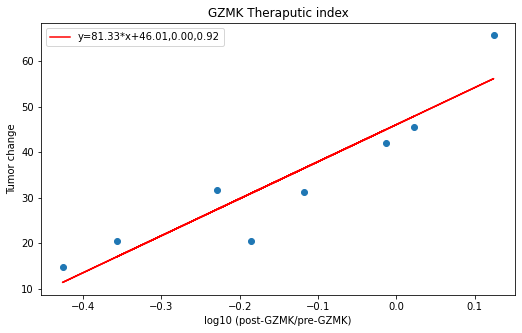

In [17]:
slope, intercept, r_GZMK12, p_GZMK12, std_err=sst.linregress(GZMK12['log ratio'],GZMK12['tumor change']*-1)
line = slope*GZMK12['log ratio']+intercept
figure=plt.figure(figsize=(8.5,5))
ax1=figure.add_subplot(111)
ax1.plot(GZMK12['log ratio'], line, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_GZMK12,r_GZMK12))
ax1.scatter(GZMK12['log ratio'],GZMK12['tumor change']*-1)
#sns.regplot(GZMK12['log ratio'],GZMK12['tumor change'])
plt.title("GZMK Theraputic index")
#plt.savefig("myeloid/"+index+".pdf")
plt.legend()
plt.grid(False)
plt.xlabel('log10 (post-GZMK/pre-GZMK)')
plt.ylabel('Tumor change')

Text(0, 0.5, 'Tumor change')

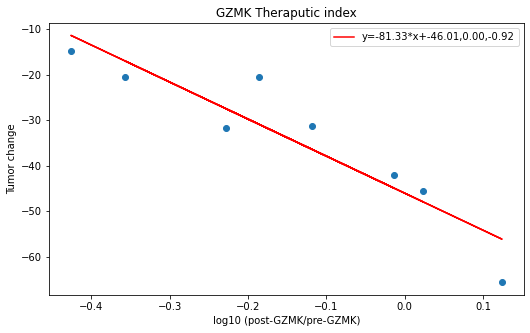

In [119]:
slope, intercept, r_GZMK12, p_GZMK12, std_err=sst.linregress(GZMK12['log ratio'],GZMK12['tumor change'])
line = slope*GZMK12['log ratio']+intercept
figure=plt.figure(figsize=(8.5,5))
ax1=figure.add_subplot(111)
ax1.plot(GZMK12['log ratio'], line, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_GZMK12,r_GZMK12))
ax1.scatter(GZMK12['log ratio'],GZMK12['tumor change'])
#sns.regplot(GZMK12['log ratio'],GZMK12['tumor change'])
plt.title("GZMK Theraputic index")
#plt.savefig("myeloid/"+index+".pdf")
plt.legend()
plt.grid(False)
plt.xlabel('log10 (post-GZMK/pre-GZMK)')
plt.ylabel('Tumor change')

In [120]:
figure.savefig("revised_svg_figures/GZMK12_TI_regression_plot.svg")

In [22]:
###tumor metagenes cor
top_genes=pd.read_csv("tumor_cnv/tumor_4_metagenes.txt",sep="\t")

In [23]:
Tumor_raw_cnv_remove_6=sc.read_h5ad("tumor_cnv/tumor_meta_data.h5")

In [ ]:
Tumor_raw_cnv_remove_6

In [24]:
Rename={'caiwanqiang':'P09',#P09
        'shiyi':'P10',#P10
        'guozhixing_biopsy':'P01_Pre', #P01_Pre
        'guozhixing_surgery':'P01_Post',#P01_Post
        'lilanying_biopsy':'P02_Pre',#P02
        'lilanying_surgery':'P02_Post',
       'nianshizhu_biopsy':'P03_Pre',#P03
       'nianshizhu_surgery':'P03_Post',
        'sunzhengyun_biopsy':'P04_Pre',#P04
        'sunzhengyun_surgery':'P04_Post',
        'wandeyuan_biopsy':'P05_Pre',#P05
        'wandeyuan_surgery':'P05_Post',
        'wangzhu_biopsy':'P06_Pre',#P06
        'wangzhu_surgery':'P06_Post',
        'zhouyunmei_biopsy':'P07_Pre',#P07
        'zhouyunmei_surgery':'P07_Post',
        'zhuanglili_biopsy':'P08_Pre',#P08
        'zhuanglili_surgery':'P08_Post'
       }

In [25]:
Rename={'caiwanqiang':'ICC_P1_C',#P09
        'shiyi':'ICC_P2_C',#P10
        'guozhixing_biopsy':'ICC_P3_B', #P01_Pre
        'guozhixing_surgery':'ICC_P3_S',#P01_Post
        'lilanying_biopsy':'ICC_P4_B',#P02
        'lilanying_surgery':'ICC_P4_S',
       'nianshizhu_biopsy':'ICC_P5_B',#P03
       'nianshizhu_surgery':'ICC_P5_S',
        'sunzhengyun_biopsy':'ICC_P6_B',#P04
        'sunzhengyun_surgery':'ICC_P6_S',
        'wandeyuan_biopsy':'ICC_P7_B',#P05
        'wandeyuan_surgery':'ICC_P7_S',
        'wangzhu_biopsy':'ICC_P8_B',#P06
        'wangzhu_surgery':'ICC_P8_S',
        'zhouyunmei_biopsy':'ICC_P9_B',#P07
        'zhouyunmei_surgery':'ICC_P9_S',
        'zhuanglili_biopsy':'ICC_P10_B',#P08
        'zhuanglili_surgery':'ICC_P10_S'
       }

In [26]:
Tumor_raw_cnv_remove_6.obs['Rename']=Tumor_raw_cnv_remove_6.obs.apply(lambda x:Rename[x['sample']],axis=1)

In [27]:
Tumor_raw_cnv_remove_6.obs['tumor_subtypes']=Tumor_raw_cnv_remove_6.obs.apply(lambda x:'T'+str(x['leiden']),axis=1)

In [28]:
Tumor_raw_cnv_remove_6.obs.head()

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,pct_counts_ribo,total_counts_hb,pct_counts_hb,n_genes,cnv_leiden,cnv_score,leiden,Meta_group,Rename,tumor_subtypes
AAACGGGCAACTGGCC-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,5.318340,0.0,0.000000,5334,5,0.004271,3,1,ICC_P1_C,T3
AAACGGGTCAACGGGA-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,5.392100,0.0,0.000000,5369,9,0.016526,11,1,ICC_P1_C,T11
AAAGATGCACATCCGG-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,4.057056,1.0,0.005846,4173,5,0.004271,3,1,ICC_P1_C,T3
AAAGATGGTGCTTCTC-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,6.905630,0.0,0.000000,3567,9,0.016526,11,1,ICC_P1_C,T11
AAAGATGTCGCTGATA-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,3.423900,0.0,0.000000,4707,9,0.016526,11,1,ICC_P1_C,T11


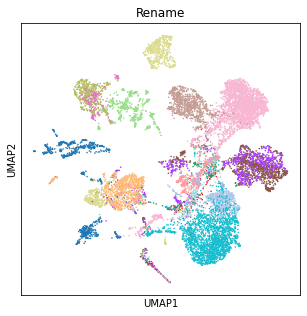

In [14]:
figure2=plt.figure(figsize=(5,5))
ax1=figure2.add_subplot(111)
sc.pl.umap(Tumor_raw_cnv_remove_6,color='Rename',legend_loc='on_data',ax=ax1)
figure2.savefig("revised_svg_figures/tumor_sample_on_data.svg")

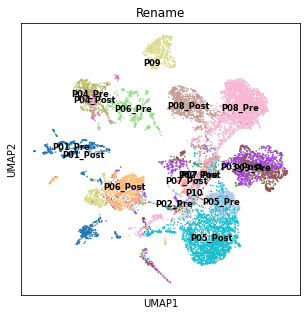

In [15]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.umap(Tumor_raw_cnv_remove_6,color='Rename',ax=ax1,legend_loc='on data',legend_fontsize='small')
figure.savefig("revised_svg_figures/tumor_sample_on_data.svg")
#ax2=figure.add_subplot(222)
#sc.pl.umap(Tumor_raw_cnv_remove_6,color='Meta_group',ax=ax2,legend_loc='on_data')

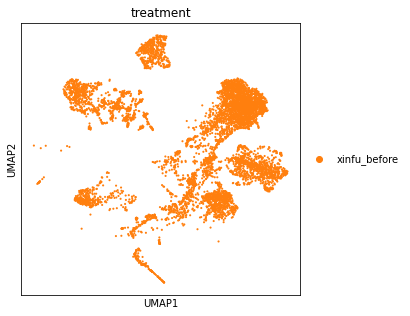

In [515]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.umap(Tumor_raw_cnv_remove_6[Tumor_raw_cnv_remove_6.obs['treatment']=='xinfu_before'],color='treatment',ax=ax1,)
figure.savefig("revised_svg_figures/tumor_leiden_treatment_before.svg")

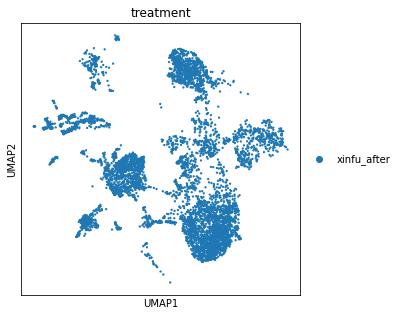

In [516]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.umap(Tumor_raw_cnv_remove_6[Tumor_raw_cnv_remove_6.obs['treatment']=='xinfu_after'],color='treatment',ax=ax1,)
figure.savefig("revised_svg_figures/tumor_leiden_treatment_after.svg")

In [517]:
%pwd

'/OceanStor100D/home/sunyidi_lab/llwu/liver_project'

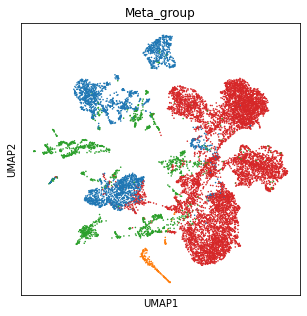

In [394]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.umap(Tumor_raw_cnv_remove_6,color='Meta_group',ax=ax1,legend_loc='on_data')
figure.savefig("revised_svg_figures/tumor_metagene.svg")

In [122]:
liver_scdata=sc.read_h5ad("/OceanStor100D/home/sunyidi_lab/sunyn/jupyter_slum/liver_cell_type_TCR.h5ad")

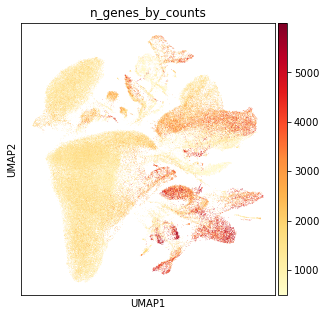

In [125]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.umap(liver_scdata,color='n_genes_by_counts',cmap='YlOrRd',ax=ax1,)
figure.savefig("revised_svg_figures/tumor_genes_by_counts_supple.svg")

In [29]:
top_genes=pd.read_csv("tumor_cnv/tumor_4_metagenes.txt",sep="\t")

In [30]:
top_genes_expression=sc.get.obs_df(Tumor_raw_cnv_remove_6,keys=['sample',*top_genes.stack().values])

In [31]:
top_genes_expression['sample']=top_genes_expression['sample'].astype(str)

In [32]:
sample_level_mean=top_genes_expression.groupby('sample').mean()

In [34]:
sample_level_mean.corr().to_csv("source_data/figure3E.txt",sep="\t")

In [104]:
top_gene_corr=top_genes_expression[top_genes_expression.columns[~top_genes_expression.columns.isin(['sample'])]].corr()

In [105]:
top_genes_list=list(top_genes_expression.columns[1:])

In [114]:
?sns.heatmap

In [36]:
import seaborn as sns

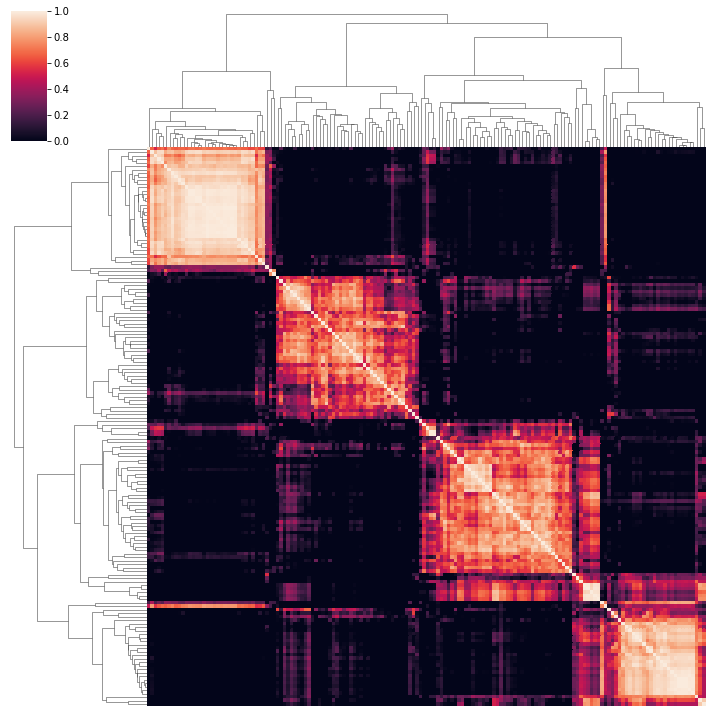

In [37]:
sns.clustermap(sample_level_mean.corr(),vmin=0,vmax=1,yticklabels=False,xticklabels=False,cbar_kws={"shrink": 0.1})

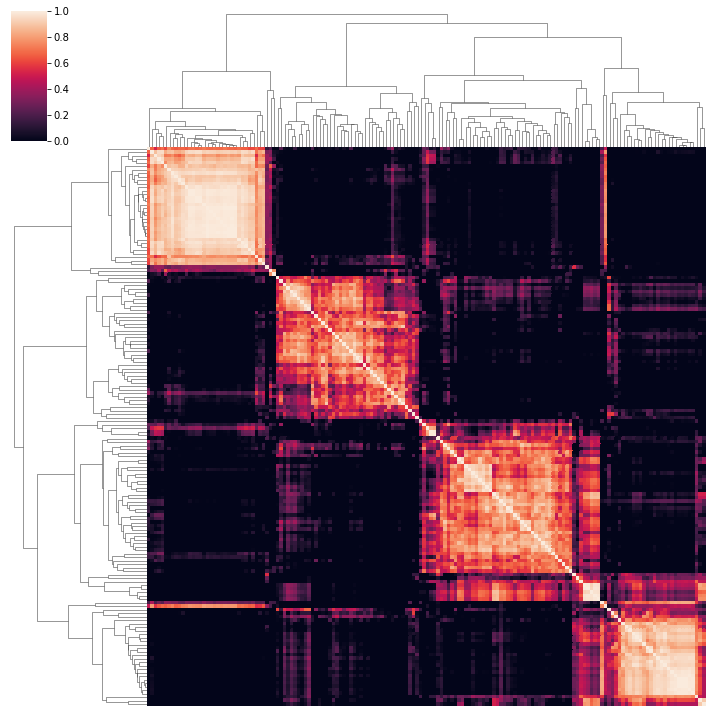

In [116]:
sns.clustermap(sample_level_mean.corr(),vmin=0,vmax=1,yticklabels=False,xticklabels=False,cbar_kws={"shrink": 0.1})
plt.savefig("revised_svg_figures/meta_4_class.svg")

In [38]:
###pathway gene presentation
##C1/C2/C3/C4 marker 展示
C1=['GSTP1','ALDH3A1','AGR2','GSTM3']
C2=['AHSG','APOA1','APOH','APOA2','ALB','SERPINC1','APOB','APOA5','APOC1','APOC2','APOC3','SAA4','HP','ORM2','A1BG','ORM1','PLG','HRG']
C3=['HLA-DPB1','HLA-DRA','HLA-DRB1','HLA-DQB1','HLA-DQA1','HLA-DQA2']
C4=['FOS','HSP90AA1','HSP90AB1','CXCL8','JUN','JUND','NFKBIA']

In [39]:
Tumor_biopsy=Tumor_raw_cnv_remove_6[Tumor_raw_cnv_remove_6.obs['sample'].str.endswith('biopsy')].copy()

In [40]:
tumor_class={}
for key,value in tumor_change.items():
    if value <-30:
        new_key=key.split('_')[0]+'_biopsy'
        tumor_class[new_key]='Respond well'
    else:
        new_key=key.split('_')[0]+'_biopsy'
        tumor_class[new_key]='Respond poor'

In [41]:
Tumor_raw_cnv_remove_6.obs.head()

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,pct_counts_ribo,total_counts_hb,pct_counts_hb,n_genes,cnv_leiden,cnv_score,leiden,Meta_group,Rename,tumor_subtypes
AAACGGGCAACTGGCC-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,5.318340,0.0,0.000000,5334,5,0.004271,3,1,ICC_P1_C,T3
AAACGGGTCAACGGGA-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,5.392100,0.0,0.000000,5369,9,0.016526,11,1,ICC_P1_C,T11
AAAGATGCACATCCGG-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,4.057056,1.0,0.005846,4173,5,0.004271,3,1,ICC_P1_C,T3
AAAGATGGTGCTTCTC-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,6.905630,0.0,0.000000,3567,9,0.016526,11,1,ICC_P1_C,T11
AAAGATGTCGCTGATA-1-0,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,3.423900,0.0,0.000000,4707,9,0.016526,11,1,ICC_P1_C,T11


In [42]:
#sc.pl.dotplot(Tumor_raw_cnv_remove_6[Tumor_raw_cnv_remove_6.obs['Meta_group'].isin(['3','4'])], ['IFNG'], groupby='treatment')

In [43]:
Tumor_biopsy.obs['respond']=Tumor_biopsy.obs.apply(lambda x:tumor_class[x['sample']],axis=1)

In [44]:
markers=['GSTM3','AGR2','APOA2','ALB','HLA-DRA','HLA-DRB1','CXCL8','JUND']

... storing 'Rename' as categorical
... storing 'tumor_subtypes' as categorical
... storing 'respond' as categorical


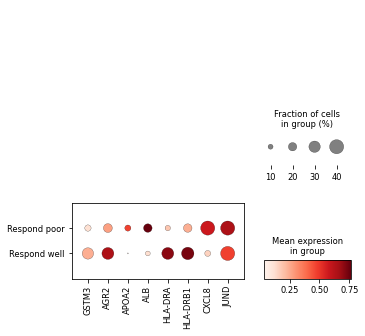

In [45]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.dotplot(Tumor_biopsy,markers, groupby='respond',dot_max=0.4,ax=ax1)

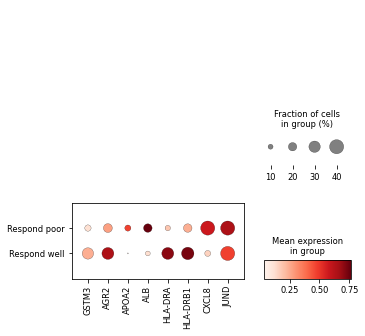

In [196]:
figure=plt.figure(figsize=(5,5))
ax1=figure.add_subplot(111)
sc.pl.dotplot(Tumor_biopsy, markers, groupby='respond',dot_max=0.4,ax=ax1)
figure.savefig("revised_svg_figures/tumor_markers.svg")

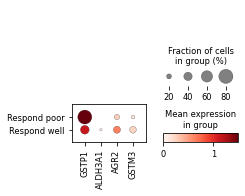

In [146]:
sc.pl.dotplot(Tumor_biopsy, C1, groupby='respond')

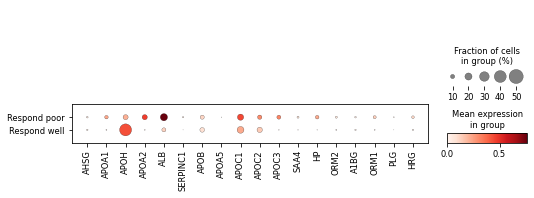

In [147]:
sc.pl.dotplot(Tumor_biopsy, C2, groupby='respond')

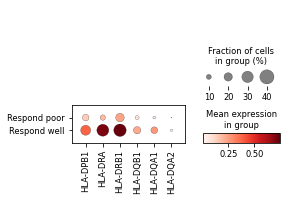

In [148]:
sc.pl.dotplot(Tumor_biopsy, C3, groupby='respond')

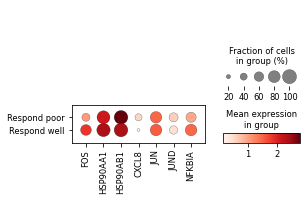

In [149]:
sc.pl.dotplot(Tumor_biopsy, C, groupby='respond')

In [23]:
###GZMB/proliferationg
T_cell_subtypes,box_pairs,cell_type_order_subtypes=get_statistics("statistics/T_further_subtypes_counts.csv",'T_cell_further_subtype')

In [25]:
tumor_change2={}
for key,value in tumor_change.items():
    tumor_change2[key]=value
    tumor_change2[key.split("_")[0]+'_'+'biopsy']=value



In [199]:
 T_cell_subtypes.head()

,sample,T_cell_further_subtype,count,Group,percentage,group class
0,caiwanqiang,CD4 naive,1304,0,0.301992,Biopsy
1,caiwanqiang,CD8 GZMK_1,518,0,0.119963,Biopsy
2,caiwanqiang,CD8 GZMB,73,0,0.016906,Biopsy
3,caiwanqiang,NK_1,623,0,0.144280,Biopsy
4,caiwanqiang,CD4 SOCS3,57,0,0.013201,Biopsy


In [212]:
##GZMK/GZMB
result_GK_GB={}
result_pro_GB={}
result_pro_GK={}
for key,value in T_cell_subtypes.groupby(['sample']):
    GB=list(value.loc[value['T_cell_further_subtype']=='CD8 GZMB','percentage'])[0]
    GK=sum(value.loc[value['T_cell_further_subtype'].str.startswith('CD8 GZMK'),'percentage'])
    pro=list(value.loc[value['T_cell_further_subtype']=='CD8 proliferating','percentage'])[0]
    result_GK_GB[key]=GK/GB
    result_pro_GB[key]=GB/pro
    result_pro_GK[key]=GK/pro

In [211]:
def get_df(result,col_name):
    result_df=pd.DataFrame.from_dict(result,orient="index")
    result_df.columns=[col_name]
    result_df['sample']=result_df.index

    result_df2=result_df.drop(['caiwanqiang','shiyi']).copy()
    result_df2['change']=result_df2.apply(lambda x:tumor_change2[x['sample']],axis=1)
    result_df2['group']=result_df2['sample'].str.endswith('surgery')*1
    return result_df2

In [480]:
###GZMK/GZMB
GZMK_GZMB=get_df(result_GK_GB,'GK_GB')

In [219]:
#result_GK_GB
result_pro_GK_df=get_df(result_pro_GK,"GK_pro")
result_pro_GK_df_base=result_pro_GK_df.loc[result_pro_GK_df['group']==0].copy()
result_pro_GK_df_base['logratio']=np.log10(result_pro_GK_df_base['GK_pro'])

In [223]:
result_pro_GK_df_base['logratio']=np.log10(result_pro_GK_df_base['GK_pro'])

pro_GKchanges=np.log10(result_pro_GK_df.loc[result_pro_GK_df['group']==1,'GK_pro'].values/result_pro_GK_df.loc[result_pro_GK_df['group']==0,'GK_pro'])

In [308]:
pro_GKchanges_nonlog=result_pro_GK_df.loc[result_pro_GK_df['group']==1,'GK_pro'].values/result_pro_GK_df.loc[result_pro_GK_df['group']==0,'GK_pro']

In [269]:
##GK/pro
slope, intercept, r_value, p_value, std_err=sst.linregress(pro_GKchanges,result_pro_GK_df.loc[result_pro_GK_df['group']==1,'change'])

In [336]:
GK_pro_changes=pd.DataFrame(pro_GKchanges_nonlog)

In [332]:
GK_pro_changes=pd.DataFrame(pro_GKchanges)

In [337]:
GK_pro_changes['change']=result_pro_GK_df.loc[result_pro_GK_df['group']==1,'change'].values

In [338]:
GK_pro_changes['Respond']=GK_pro_changes.apply(lambda x:'Respond Well' if x['change']<-30 else 'Respond Poor',axis=1)

In [725]:
GK_pro_changes.to_pickle("GK_pro_changes.pkl")

In [85]:
GK_pro_changes=pd.read_pickle("GK_pro_changes.pkl")

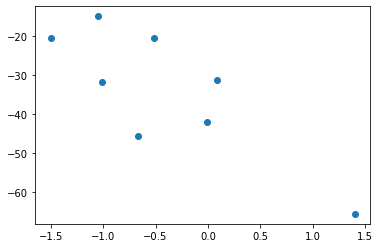

In [340]:
plt.scatter(pro_GKchanges,result_pro_GK_df.loc[result_pro_GK_df['group']==1,'change'])

In [341]:
sst.ttest_ind(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Poor','GK_pro'],GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Well','GK_pro'],equal_var=False)

Ttest_indResult(statistic=-1.097301458320685, pvalue=0.33409831101454)

In [328]:
sst.ttest_ind(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Poor','GK_pro'],GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Well','GK_pro'],equal_var=False)

Ttest_indResult(statistic=-1.9564202303333977, pvalue=0.09821751562376721)

In [354]:
np.mean(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Poor','GK_pro'])

0.1416001065177499

In [355]:
np.mean(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Well','GK_pro'])

5.550320851950524

In [351]:
np.median(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Poor','GK_pro'])

0.08980755523877405

In [349]:
np.median(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Well','GK_pro'])

0.9810951760104304

In [481]:
GK_pro_changes

,GK_pro,change,Respond
guozhixing_biopsy,0.214732,-45.57,Respond Well
lilanying_biopsy,0.089808,-14.84,Respond Poor
nianshizhu_biopsy,0.303477,-20.52,Respond Poor
sunzhengyun_biopsy,0.981095,-42.00,Respond Well
wandeyuan_biopsy,0.098259,-31.70,Respond Well
wangzhu_biopsy,25.245370,-65.63,Respond Well
zhouyunmei_biopsy,0.031515,-20.45,Respond Poor
zhuanglili_biopsy,1.212147,-31.26,Respond Well


In [724]:
sst.mannwhitneyu(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Poor','GK_pro'],GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Well','GK_pro'])

MannwhitneyuResult(statistic=2.0, pvalue=0.06801856405707181)

In [86]:
sst.mannwhitneyu(GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Poor','GK_pro'],GK_pro_changes.loc[GK_pro_changes['Respond']=='Respond Well','GK_pro'])

MannwhitneyuResult(statistic=2.0, pvalue=0.06801856405707181)

In [87]:
GK_pro_changes.to_csv("source_data/Figure6N1.txt",sep="\t")

Text(0.5, 1.0, 'GZMK/proliferating Ratio change')

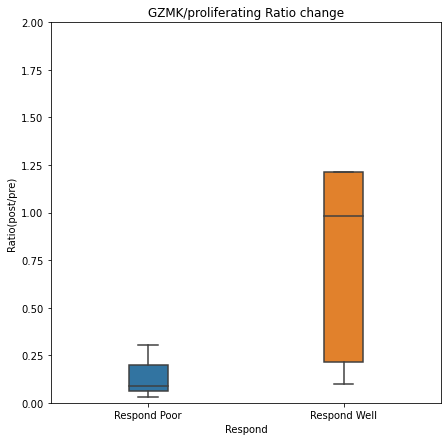

In [344]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.boxplot(x='Respond',y='GK_pro',data=GK_pro_changes,ax=ax1,order=['Respond Poor','Respond Well'],width=0.2)
plt.ylim([0,2])
plt.ylabel("Ratio(post/pre)")
plt.title("GZMK/proliferating Ratio change")

In [353]:
figure.savefig("Revision_plot/GZMK_proliferation.svg")

In [726]:
GK_pro_changes

,GK_pro,change,Respond
guozhixing_biopsy,0.214732,-45.57,Respond Well
lilanying_biopsy,0.089808,-14.84,Respond Poor
nianshizhu_biopsy,0.303477,-20.52,Respond Poor
sunzhengyun_biopsy,0.981095,-42.00,Respond Well
wandeyuan_biopsy,0.098259,-31.70,Respond Well
wangzhu_biopsy,25.245370,-65.63,Respond Well
zhouyunmei_biopsy,0.031515,-20.45,Respond Poor
zhuanglili_biopsy,1.212147,-31.26,Respond Well


In [307]:
result_pro_GK_df.loc[result_pro_GK_df['group']==1,'change']

guozhixing_surgery    -45.57
lilanying_surgery     -14.84
nianshizhu_surgery    -20.52
sunzhengyun_surgery   -42.00
wandeyuan_surgery     -31.70
wangzhu_surgery       -65.63
zhouyunmei_surgery    -20.45
zhuanglili_surgery    -31.26
Name: change, dtype: float64

In [305]:
pro_GKchanges

guozhixing_biopsy    -0.668103
lilanying_biopsy     -1.046687
nianshizhu_biopsy    -0.517874
sunzhengyun_biopsy   -0.008289
wandeyuan_biopsy     -1.007627
wangzhu_biopsy        1.402182
zhouyunmei_biopsy    -1.501478
zhuanglili_biopsy     0.083555
Name: GK_pro, dtype: float64

In [274]:
ti_data={}
ti_data["GK_pro"]=[0.66,0.013]

In [275]:
pi

{'GK_pro': [-0.769, 0.004],
 'GB_pro': [0.0196, 0.736],
 'GK_GB': [-0.466, 0.062]}

In [278]:
#GB/pro
slope, intercept, r_value, p_value, std_err=sst.linregress(np.log10(result_pro_GB_df.loc[result_pro_GB_df['group']==1,'GB_pro'].values/result_pro_GB_df.loc[result_pro_GB_df['group']==0,'GB_pro'].values),result_pro_GB_df_base['change'])

In [279]:
slope, intercept, r_value, p_value, std_err

(-14.058414004989212,
 -32.29120064866709,
 -0.5220715698459537,
 0.18444083739503414,
 9.376259741301313)

In [282]:
get_pi(-0.522,-14.058)

0.272484

In [284]:
ti_data['GB_pro']=[0.272,0.18]

In [287]:
result_GK_GB_df.head()

,GK_GB,sample,change,group
guozhixing_biopsy,24.812500,guozhixing_biopsy,-45.57,0
guozhixing_surgery,8.043103,guozhixing_surgery,-45.57,1
lilanying_biopsy,25.053571,lilanying_biopsy,-14.84,0
lilanying_surgery,2.840426,lilanying_surgery,-14.84,1
nianshizhu_biopsy,29.341463,nianshizhu_biopsy,-20.52,0


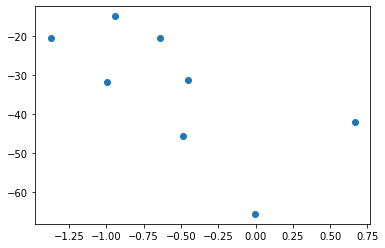

In [289]:
plt.scatter(np.log10(result_GK_GB_df.loc[result_GK_GB_df['group']==1,'GK_GB'].values/result_GK_GB_df.loc[result_GK_GB_df['group']==0,"GK_GB"].values),result_GK_GB_df_base['change'])

In [290]:
#GK/GB
sst.linregress(np.log10(result_GK_GB_df.loc[result_GK_GB_df['group']==1,'GK_GB'].values/result_GK_GB_df.loc[result_GK_GB_df['group']==0,"GK_GB"].values),result_GK_GB_df_base['change'])

LinregressResult(slope=-17.103219325461318, intercept=-43.04937967113218, rvalue=-0.6521623554319088, pvalue=0.07967475682632098, stderr=8.116357447609461, intercept_stderr=6.459590155077156)

In [478]:
result_GK_GB_df

,GK_GB,sample,change,group
guozhixing_biopsy,24.812500,guozhixing_biopsy,-45.57,0
guozhixing_surgery,8.043103,guozhixing_surgery,-45.57,1
lilanying_biopsy,25.053571,lilanying_biopsy,-14.84,0
lilanying_surgery,2.840426,lilanying_surgery,-14.84,1
nianshizhu_biopsy,29.341463,nianshizhu_biopsy,-20.52,0
nianshizhu_surgery,6.740000,nianshizhu_surgery,-20.52,1
sunzhengyun_biopsy,1.364769,sunzhengyun_biopsy,-42.00,0
sunzhengyun_surgery,6.323529,sunzhengyun_surgery,-42.00,1
wandeyuan_biopsy,124.615385,wandeyuan_biopsy,-31.70,0
wandeyuan_surgery,12.633333,wandeyuan_surgery,-31.70,1


In [292]:
get_pi(-0.6521,-17.1032)

0.42523441

In [293]:
ti_data['GK_GB']=[0.425,0.0796]

In [294]:
ti_data

{'GK_pro': [0.66, 0.013], 'GB_pro': [0.272, 0.18], 'GK_GB': [0.425, 0.0796]}

In [295]:
pi

{'GK_pro': [-0.769, 0.004],
 'GB_pro': [0.0196, 0.736],
 'GK_GB': [-0.466, 0.062]}

In [303]:
with open("Revision_plot/combinantion_pi.txt",'w+') as f:
    print('Ratio_group','PI','P val',sep="\t",file=f)
    for key,value in pi.items():
        new_key="/".join(key.split('_'))
        print(new_key,*value,file=f)

In [304]:
with open("Revision_plot/combinantion_ti.txt",'w+') as f:
    print('Ratio_group','TI','P val',sep="\t",file=f)
    for key,value in ti_data.items():
        new_key="/".join(key.split('_'))
        print(new_key,*value,file=f)

In [226]:
plt.scatter(np.log10(result_pro_GK_df.loc[result_pro_GB_df['group']==1,'GB_pro'].values/result_pro_GB_df.loc[result_pro_GB_df['group']==0,'GB_pro'].values),result_pro_GB_df_base['change'])

,GK_pro,sample,change,group,logratio
guozhixing_biopsy,11.027778,guozhixing_biopsy,-45.57,0,1.042488
lilanying_biopsy,33.404762,lilanying_biopsy,-14.84,0,1.523808
nianshizhu_biopsy,92.538462,nianshizhu_biopsy,-20.52,0,1.966322
sunzhengyun_biopsy,5.766917,sunzhengyun_biopsy,-42.00,0,0.760944
wandeyuan_biopsy,77.142857,wandeyuan_biopsy,-31.70,0,1.887296


In [229]:
#c_piti=open('Revision_plot/combination_pi_ti',"w+")
#print(["slope", "intercept", "r_value", "p_value", "std_err"],sep="\t")    
#print(slope, intercept, r_value, p_value, std_err,sep="\t")

22.063670449103444	-61.14868029188722	0.8773179824204119	0.004201859950560936	4.927248666130388


In [231]:
pi={}
pi["GK_pro"]=[-0.769,0.004]

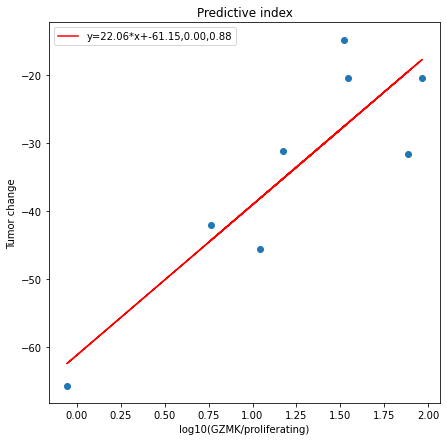

In [234]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
slope, intercept, r_value, p_value, std_err=sst.linregress(result_pro_GK_df_base['logratio'],result_pro_GK_df_base['change'])
line1=slope*result_pro_GK_df_base['logratio']+intercept
ax1.plot(result_pro_GK_df_base['logratio'], line1, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_value,r_value))
ax1.scatter(result_pro_GK_df_base['logratio'],result_pro_GK_df_base['change']) 
ax1.set_xlabel("log10(GZMK/proliferating)")
ax1.set_ylabel("Tumor change")
ax1.set_title("Predictive index")
plt.legend()
figure.savefig("Revision_plot/GK_pro_pi.svg")

In [233]:
result_pro_GB_df=get_df(result_pro_GB,'GB_pro')
result_pro_GB_df_base=result_pro_GB_df.loc[result_pro_GB_df['group']==0].copy()
result_pro_GB_df_base['logratio']=np.log10(result_pro_GB_df_base['GB_pro'])

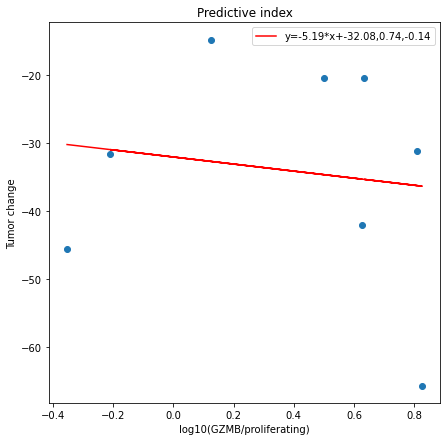

In [246]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
slope, intercept, r_value, p_value, std_err=sst.linregress(result_pro_GB_df_base['logratio'],result_pro_GB_df_base['change'])
line1=slope*result_pro_GB_df_base['logratio']+intercept
ax1.plot(result_pro_GB_df_base['logratio'], line1, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_value,r_value))
ax1.scatter(result_pro_GB_df_base['logratio'],result_pro_GB_df_base['change']) 
ax1.set_xlabel("log10(GZMB/proliferating)")
ax1.set_ylabel("Tumor change")
ax1.set_title("Predictive index")
plt.legend()
figure.savefig("Revision_plot/GB_pro_pi.svg")

In [236]:
slope, intercept, r_value, p_value, std_err

(-5.1905310481091735,
 -32.077731269959436,
 -0.1426152911041849,
 0.7362000424009196,
 14.70645363295463)

In [238]:
def get_pi(R,slope):
    pi=-R*R*slope/abs(slope)
    return pi

In [241]:
pi["GB_pro"]=[0.0196,0.736]

In [244]:
result_GK_GB_df=get_df(result_GK_GB,'GK_GB')
result_GK_GB_df_base=result_GK_GB_df.loc[result_GK_GB_df['group']==0].copy()
result_GK_GB_df_base['logratio']=np.log10(result_GK_GB_df_base['GK_GB'])

In [253]:
?sst.linregress

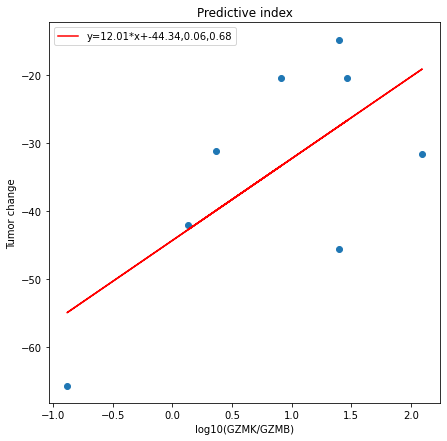

In [248]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
slope, intercept, r_value, p_value, std_err=sst.linregress(result_GK_GB_df_base['logratio'],result_GK_GB_df_base['change'])
line1=slope*result_GK_GB_df_base['logratio']+intercept
ax1.plot(result_GK_GB_df_base['logratio'], line1, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_value,r_value))
ax1.scatter(result_GK_GB_df_base['logratio'],result_GK_GB_df_base['change']) 
ax1.set_xlabel("log10(GZMK/GZMB)")
ax1.set_ylabel("Tumor change")
ax1.set_title("Predictive index")
plt.legend()
figure.savefig("Revision_plot/GZMK_GZMB.svg")

In [249]:
slope, intercept, r_value, p_value, std_err

(12.01361282790221,
 -44.3402205314233,
 0.68276492437763,
 0.0620296462755531,
 5.24842662092806)

In [252]:
get_pi(0.6827,12.0136128279022)

-0.46607929

In [254]:
pi['GK_GB']=[-0.466,0.062]

In [255]:
pi

{'GK_pro': [-0.769, 0.004],
 'GB_pro': [0.0196, 0.736],
 'GK_GB': [-0.466, 0.062]}

In [299]:
ti_data

{'GK_pro': [0.66, 0.013], 'GB_pro': [0.272, 0.18], 'GK_GB': [0.425, 0.0796]}

In [55]:
result={}
for key,value in T_cell_subtypes.groupby(['sample']):
    GB=list(value.loc[value['T_cell_further_subtype']=='CD8 GZMB','percentage'])[0]
    Pro=list(value.loc[value['T_cell_further_subtype']=='CD8 proliferating','percentage'])[0]
    result[key]=GB/Pro
result_df=pd.DataFrame.from_dict(result,orient="index")
result_df.columns=['GZMB/proliferating']
result_df['sample']=result_df.index

result_df2=result_df.drop(['caiwanqiang','shiyi']).copy()
result_df2['change']=result_df2.apply(lambda x:tumor_change2[x['sample']],axis=1)

result_df2['group']=result_df2['sample'].str.endswith('surgery')*1

In [58]:
result_df2_base=result_df2.loc[result_df2['group']==0]

In [63]:
result_df2_base['logratio']=np.log10(result_df2_base['GZMB/proliferating'])

<ipython-input-63-9a6c9b34e408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2_base['logratio']=np.log10(result_df2_base['GZMB/proliferating'])


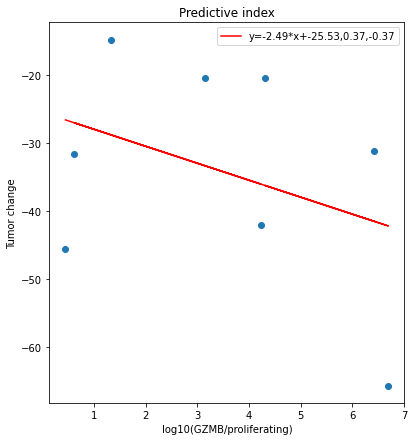

In [62]:
figure=plt.figure(figsize=(14,7))
ax1=figure.add_subplot(121)
slope, intercept, r_value, p_value, std_err=sst.linregress(result_df2_base['GZMB/proliferating'],result_df2_base['change'])
line1=slope*result_df2_base['GZMB/proliferating']+intercept
ax1.plot(result_df2_base['GZMB/proliferating'], line1, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_value,r_value))
ax1.scatter(result_df2_base['GZMB/proliferating'],result_df2_base['change']) 
ax1.set_xlabel("log10(GZMB/proliferating)")
ax1.set_ylabel("Tumor change")
ax1.set_title("Predictive index")
plt.legend()

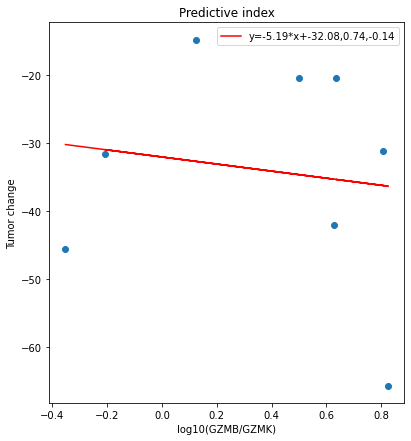

In [64]:
figure=plt.figure(figsize=(14,7))
ax1=figure.add_subplot(121)
slope, intercept, r_value, p_value, std_err=sst.linregress(result_df2_base['logratio'],result_df2_base['change'])
line1=slope*result_df2_base['logratio']+intercept
ax1.plot(result_df2_base['logratio'], line1, 'r', label='y={:.2f}*x+{:.2f},{:.2f},{:.2f}'.format(slope,intercept,p_value,r_value))
ax1.scatter(result_df2_base['logratio'],result_df2_base['change']) 
ax1.set_xlabel("log10(GZMB/GZMK)")
ax1.set_ylabel("Tumor change")
ax1.set_title("Predictive index")
plt.legend()

In [67]:
result_df2_base=result_df2.loc[result_df2['group']==0]
result_df2_surgery=result_df2.loc[result_df2['group']==1]

In [93]:
result_df2_base['Group']=result_df2_base.apply(lambda x:"well" if x['change']<-30 else "poor",axis=1)

result_df2_base['surgery_biopsy']=change

<ipython-input-93-5a376f46fa1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2_base['Group']=result_df2_base.apply(lambda x:"well" if x['change']<-30 else "poor",axis=1)


In [121]:
np.mean(result_df2_base.loc[result_df2_base['Group']=='poor','surgery_biopsy'])

-0.11785653634825229

In [122]:
np.mean(result_df2_base.loc[result_df2_base['Group']=='well','surgery_biopsy'])

35.38193520319499

In [ ]:
##ratio change
##GZMK/GZMB
result_GK_GB={}
result_pro_GB={}
result_pro_GK={}
for key,value in T_cell_subtypes.groupby(['sample']):
    GB=list(value.loc[value['T_cell_further_subtype']=='CD8 GZMB','percentage'])[0]
    GK=sum(value.loc[value['T_cell_further_subtype'].str.startswith('CD8 GZMK'),'percentage'])
    pro=list(value.loc[value['T_cell_further_subtype']=='CD8 proliferating','percentage'])[0]
    result_GK_GB[key]=GK/GB
    result_pro_GB[key]=GB/pro
    result_pro_GK[key]=GK/pro

In [484]:
##GZMK/GZMB
result_df_GBK=pd.DataFrame.from_dict(result_GK_GB,orient="index")
result_df_GBK.columns=['GZMB/GZMK']
result_df_GBK['sample']=result_df_GBK.index

result_df_GBKP=result_df_GBK.drop(['caiwanqiang','shiyi']).copy()
result_df_GBKP['change']=result_df_GBKP.apply(lambda x:tumor_change2[x['sample']],axis=1)
result_df_GBKP['group']=result_df_GBKP['sample'].str.endswith('surgery')*1

In [491]:
result_df2_base_GBK.head()

,GZMB/GZMK,sample,change,group
guozhixing_biopsy,24.812500,guozhixing_biopsy,-45.57,0
lilanying_biopsy,25.053571,lilanying_biopsy,-14.84,0
nianshizhu_biopsy,29.341463,nianshizhu_biopsy,-20.52,0
sunzhengyun_biopsy,1.364769,sunzhengyun_biopsy,-42.00,0
wandeyuan_biopsy,124.615385,wandeyuan_biopsy,-31.70,0


In [492]:
result_df2_base_GBK=result_df_GBKP.loc[result_df_GBKP['group']==0].copy()
result_df2_surgery_GBK=result_df_GBKP.loc[result_df_GBKP['group']==1].copy()
change_GBK=[x/y for x,y in zip(list(result_df2_surgery_GBK['GZMB/GZMK']),list(result_df2_base_GBK['GZMB/GZMK']))]

In [136]:
change=[x/y for x,y in zip(list(result_df2_surgery['GZMB/proliferating']),list(result_df2_base['GZMB/proliferating']))]

In [498]:
result_df2_base_GBK['Group']=result_df2_base_GBK.apply(lambda x:"well" if x['change']<-30 else "poor",axis=1)

result_df2_base_GBK['surgery_biopsy']=change_GBK

In [499]:
sst.ttest_ind(result_df2_base_GBK.loc[result_df2_base_GBK['Group']=='poor','surgery_biopsy'],result_df2_base_GBK.loc[result_df2_base_GBK['Group']=='well','surgery_biopsy'],equal_var=False)

Ttest_indResult(statistic=-1.3495080763209957, pvalue=0.24795513380473408)

In [502]:
np.mean(result_df2_base_GBK.loc[result_df2_base_GBK['Group']=='poor','surgery_biopsy'])

0.12842145529534185

In [503]:
np.mean(result_df2_base_GBK.loc[result_df2_base_GBK['Group']=='well','surgery_biopsy'])

1.2795870839938155

In [505]:
result_df2_base_GBK.to_pickle("result_df2_base_GBK.pkl")

In [504]:
1.27/0.128

9.921875

In [81]:
result_df2_base_GBK=pd.read_pickle("result_df2_base_GBK.pkl")

In [84]:
result_df2_base_GBK.to_csv("source_data/figure6N_2.txt",sep="\t")

(0.0, 1.5)

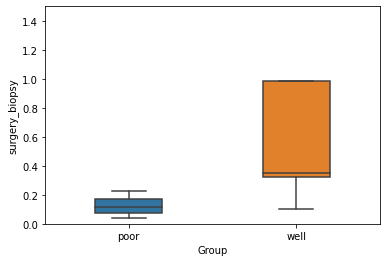

In [83]:
sns.boxplot(x='Group',y='surgery_biopsy',data=result_df2_base_GBK,order=['poor','well'],width=0.4,)
plt.ylim([0,1.5])

In [82]:
result_df2_base_GBK

,GZMB/GZMK,sample,change,group,Group,surgery_biopsy
guozhixing_biopsy,24.812500,guozhixing_biopsy,-45.57,0,well,0.324155
lilanying_biopsy,25.053571,lilanying_biopsy,-14.84,0,poor,0.113374
nianshizhu_biopsy,29.341463,nianshizhu_biopsy,-20.52,0,poor,0.229709
sunzhengyun_biopsy,1.364769,sunzhengyun_biopsy,-42.00,0,well,4.633407
wandeyuan_biopsy,124.615385,wandeyuan_biopsy,-31.70,0,well,0.101379
wangzhu_biopsy,0.131148,wangzhu_biopsy,-65.63,0,well,0.985544
zhouyunmei_biopsy,8.142857,zhouyunmei_biopsy,-20.45,0,poor,0.042181
zhuanglili_biopsy,2.333333,zhuanglili_biopsy,-31.26,0,well,0.353450


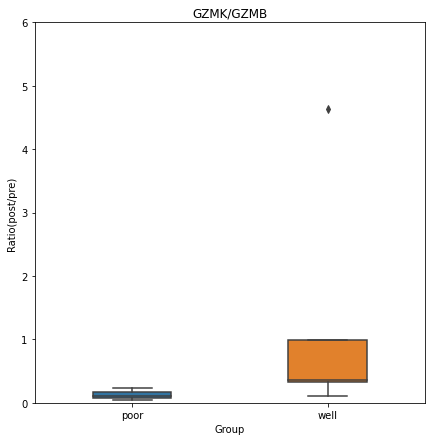

In [501]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.boxplot(x='Group',y='surgery_biopsy',data=result_df2_base_GBK,ax=ax1,order=['poor','well'],width=0.4,)
plt.ylim([0,6])
plt.ylabel("Ratio(post/pre)")
plt.title("GZMK/GZMB")
figure.savefig("revised_svg_figures/GZMK_GZMB.svg")

In [ ]:
result_df3_GBK=result_df2_base_GBK.loc[['guozhixing_biopsy', 'lilanying_biopsy', 'nianshizhu_biopsy',
       'sunzhengyun_biopsy', 'wandeyuan_biopsy',
       'zhouyunmei_biopsy', 'zhuanglili_biopsy']]

In [138]:
result_df3=result_df2_base.loc[['guozhixing_biopsy', 'lilanying_biopsy', 'nianshizhu_biopsy',
       'sunzhengyun_biopsy', 'wandeyuan_biopsy',
       'zhouyunmei_biopsy', 'zhuanglili_biopsy']]

In [124]:
np.mean(result_df3.loc[result_df3['Group']=='poor','surgery_biopsy'])

-0.11785653634825229

In [125]:
np.mean(result_df3.loc[result_df3['Group']=='well','surgery_biopsy'])

3.0261994917986104

In [116]:
1.318221/0.9534

1.3826526117054752

In [128]:
sst.ttest_ind(result_df3.loc[result_df3['Group']=='poor','surgery_biopsy'],result_df3.loc[result_df3['Group']=='well','surgery_biopsy'],equal_var=False)

Ttest_indResult(statistic=-0.7301773860947866, pvalue=0.5162201762820501)

In [129]:
np.mean(result_df3.loc[result_df3['Group']=='well','surgery_biopsy'])

3.0261994917986104

In [130]:
result_df3

,GZMB/proliferating,sample,change,group,Group,surgery_biopsy
guozhixing_biopsy,0.444444,guozhixing_biopsy,-45.57,0,well,-0.150028
lilanying_biopsy,1.333333,lilanying_biopsy,-14.84,0,poor,-0.277154
nianshizhu_biopsy,3.153846,nianshizhu_biopsy,-20.52,0,poor,1.012821
sunzhengyun_biopsy,4.225564,sunzhengyun_biopsy,-42.00,0,well,-3.330827
wandeyuan_biopsy,0.619048,wandeyuan_biopsy,-31.70,0,well,-0.019048
zhouyunmei_biopsy,4.307692,zhouyunmei_biopsy,-20.45,0,poor,-1.089237
zhuanglili_biopsy,6.423077,zhuanglili_biopsy,-31.26,0,well,15.604701


In [197]:
result_df2_base

,GZMB/proliferating,sample,change,group,Group,surgery_biopsy
guozhixing_biopsy,0.444444,guozhixing_biopsy,-45.57,0,well,0.662437
lilanying_biopsy,1.333333,lilanying_biopsy,-14.84,0,poor,0.792135
nianshizhu_biopsy,3.153846,nianshizhu_biopsy,-20.52,0,poor,1.321138
sunzhengyun_biopsy,4.225564,sunzhengyun_biopsy,-42.00,0,well,0.211744
wandeyuan_biopsy,0.619048,wandeyuan_biopsy,-31.70,0,well,0.969231
wangzhu_biopsy,6.695122,wangzhu_biopsy,-65.63,0,well,25.615665
zhouyunmei_biopsy,4.307692,zhouyunmei_biopsy,-20.45,0,poor,0.747142
zhuanglili_biopsy,6.423077,zhuanglili_biopsy,-31.26,0,well,3.429474


In [506]:
result_df2_base.to_pickle("result_df2_GB_Pro.pkl")

In [75]:
result_df2_base=pd.read_pickle("result_df2_GB_Pro.pkl")

In [79]:
result_df2_base.to_csv("source_data/Figure6N3.txt",sep="\t")

Text(0.5, 1.0, 'GZMB/proliferating Ratio change')

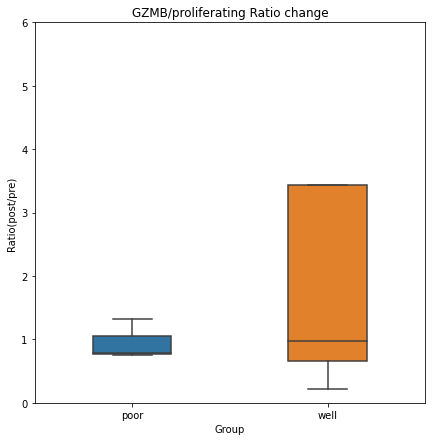

In [147]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.boxplot(x='Group',y='surgery_biopsy',data=result_df2_base,ax=ax1,order=['poor','well'],width=0.4)
plt.ylim([0,6])
plt.ylabel("Ratio(post/pre)")
plt.title("GZMB/proliferating Ratio change")

In [148]:
figure.savefig("revised_svg_figures/GZMB_prolifertaing.pdf")

In [508]:
%pwd

'/OceanStor100D/home/sunyidi_lab/llwu/liver_project'

In [133]:
result_df3

,GZMB/proliferating,sample,change,group,Group,surgery_biopsy
guozhixing_biopsy,0.444444,guozhixing_biopsy,-45.57,0,well,-0.150028
lilanying_biopsy,1.333333,lilanying_biopsy,-14.84,0,poor,-0.277154
nianshizhu_biopsy,3.153846,nianshizhu_biopsy,-20.52,0,poor,1.012821
sunzhengyun_biopsy,4.225564,sunzhengyun_biopsy,-42.00,0,well,-3.330827
wandeyuan_biopsy,0.619048,wandeyuan_biopsy,-31.70,0,well,-0.019048
zhouyunmei_biopsy,4.307692,zhouyunmei_biopsy,-20.45,0,poor,-1.089237
zhuanglili_biopsy,6.423077,zhuanglili_biopsy,-31.26,0,well,15.604701


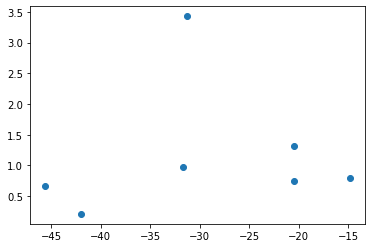

In [139]:
plt.scatter(result_df3['change'],result_df3['surgery_biopsy'])

In [4]:
import pickle

In [5]:
#[np.log(GZB_change),tumor_change_val],
with open("statistics/GZBchange.pkl",'rb') as f:
    GZB=pickle.load(f)

In [6]:
GZB_change=GZB[0]
tumor_change_val=GZB[1]

In [8]:
import seaborn as sns

In [12]:
import scipy.stats as sst

In [680]:
T_cells=sc.read_h5ad("T_Cell_new_type/T_cells_TCR_CLASS.h5")

In [682]:
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype']

T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD8 GZMK_2','CD8 GZMK')
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD8 GZMK_1','CD8 GZMK')

In [683]:
T_cells.obs['TCR_cell_type3']=T_cells.obs.apply(lambda x:x['T_cell_further_subtype2']+'_'+x['TCR_info2'],axis=1)

In [684]:
T_cell_CD4=T_cells[T_cells.obs['T_cell_further_subtype2'].isin(['CD4 SOCS3','CD4 naive','CD4 Treg_2',
                                                                              'CD4 Treg_1'])].copy()

T_cell_CD8=T_cells[T_cells.obs['T_cell_further_subtype2'].isin(['CD8 GZMK','CD8 GZMB','CD8 KLRB1','CD8 proliferating','CD8 Trm'])].copy()




In [714]:
CD8_cell_types=T_cell_CD8.obs['TCR_cell_type3'].value_counts().index

In [686]:
T_cell_CD8.obs.groupby('TCR_cell_type3').size()

TCR_cell_type3
CD8 GZMB_Contract              768
CD8 GZMB_Expand               1941
CD8 GZMB_NC                   3212
CD8 GZMK_Contract             1564
CD8 GZMK_Expand                461
CD8 GZMK_NC                   9951
CD8 KLRB1_Contract              55
CD8 KLRB1_Expand                15
CD8 KLRB1_NC                  2048
CD8 Trm_Contract               239
CD8 Trm_Expand                   2
CD8 Trm_NC                      70
CD8 proliferating_Contract     100
CD8 proliferating_Expand       240
CD8 proliferating_NC           891
dtype: int64

In [687]:
CD8_result=[]
for key,value in T_cell_CD8.obs.groupby(['sample']):
    if key in ['shiyi','caiwanqiang']:
        continue
    temp=pd.DataFrame(value['TCR_cell_type3'].value_counts()/len(value))
    temp['sample']=key
    temp['Group']=key.split('_')[-1]
    #temp.columns=key+"_"+temp.columns
    CD8_result.append(temp)

In [688]:
CD8_result_df2=pd.concat(CD8_result)
#CD8_result_df2['cell']=CD8_result_df2.index


In [693]:
CD8_result_df2.to_pickle("T_Cell_new_type/CD8_result_percentage_TCR.pkl")

In [696]:
CD8_result_df2.head()

,TCR_cell_type3,sample,Group
CD8 GZMK_NC,0.753647,guozhixing_biopsy,biopsy
CD8 GZMK_Contract,0.080227,guozhixing_biopsy,biopsy
CD8 proliferating_NC,0.068882,guozhixing_biopsy,biopsy
CD8 GZMK_Expand,0.045381,guozhixing_biopsy,biopsy
CD8 GZMB_NC,0.034036,guozhixing_biopsy,biopsy


In [20]:
result_df2_base=result_df2.loc[result_df2['group']==0,].copy()
#result_df2_base['logratio']=np.log(result_df2_base['GZ/GB'])

In [ ]:
##GZMK_1_NC,GZMK_2_NC,CD8 GZMK_1_Expand,CD8 GZMK_2_Expand,CD8 GZMK_1_Contract,CD8 GZMK_2_Contract

In [694]:
###TCR
CD8_result_df2=pd.read_pickle("T_Cell_new_type/CD8_result_percentage_TCR.pkl")

In [697]:
CD8_result_df2['TCR_cell_type'] = CD8_result_df2['TCR_cell_type3']*100

Text(0, 0.5, 'Expanded CD8 proliferating expanded percentage (%)')

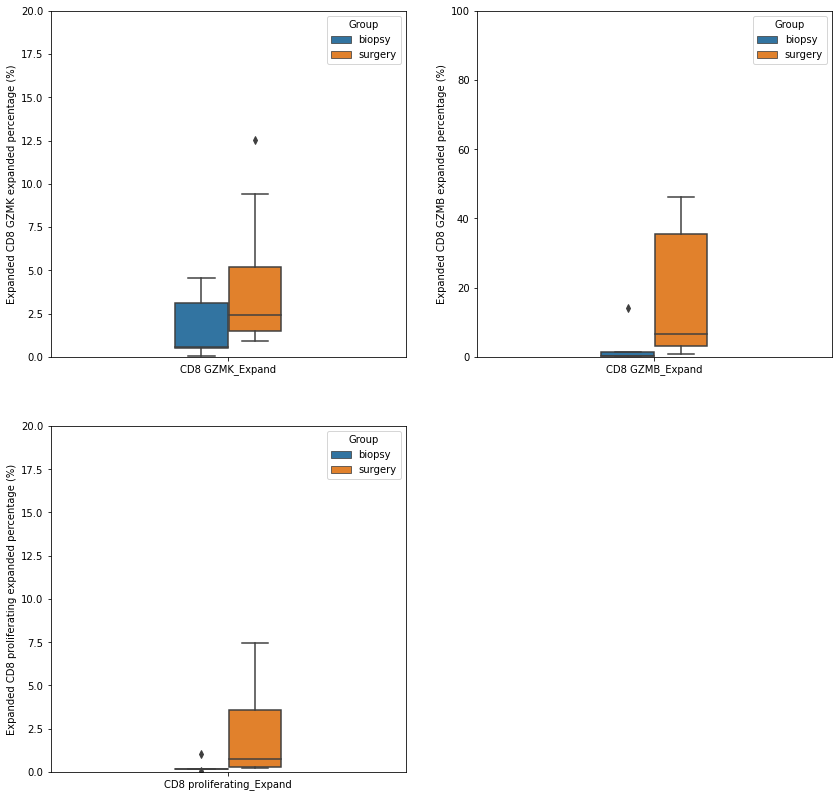

In [700]:
figure=plt.figure(figsize=(14,14))
ax1=figure.add_subplot(221)
#sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_1_NC'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_1_NC'],hue='Group',ax=ax1,width=0.6,showfliers = False)
sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_Expand'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_Expand'],hue='Group',ax=ax1,width=0.3)
ax1.set_ylim([0,20])
ax1.set_ylabel('Expanded CD8 GZMK expanded percentage (%)')
ax2=figure.add_subplot(222)
#sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_1_NC'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_1_NC'],hue='Group',ax=ax1,width=0.6,showfliers = False)
#sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_2_Expand'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_2_Expand'],hue='Group',ax=ax1,width=0.6)
sns.boxplot(x=CD8_result_df2.loc['CD8 GZMB_Expand'].index,y='TCR_cell_type',data=CD8_result_df2.loc['CD8 GZMB_Expand'],hue='Group',ax=ax2,width=0.3)

ax2.set_ylim([0,100])
ax2.set_ylabel('Expanded CD8 GZMB expanded percentage (%)')


ax3=figure.add_subplot(223)
sns.boxplot(x=CD8_result_df2.loc['CD8 proliferating_Expand'].index,y='TCR_cell_type',data=CD8_result_df2.loc['CD8 proliferating_Expand'],hue='Group',ax=ax3,width=0.3)

ax3.set_ylim([0,20])
ax3.set_ylabel('Expanded CD8 proliferating expanded percentage (%)')


In [701]:
figure.savefig("revised_svg_figures/TCR_expanded.svg")

In [705]:
CD8_biopsy=CD8_result_df2.loc[CD8_result_df2['Group']=='biopsy'].copy()
CD8_surgery=CD8_result_df2.loc[CD8_result_df2['Group']=='surgery'].copy()

In [708]:
CD8_biopsy.head()

,TCR_cell_type3,sample,Group,TCR_cell_type
CD8 GZMK_NC,0.753647,guozhixing_biopsy,biopsy,75.364668
CD8 GZMK_Contract,0.080227,guozhixing_biopsy,biopsy,8.022690
CD8 proliferating_NC,0.068882,guozhixing_biopsy,biopsy,6.888169
CD8 GZMK_Expand,0.045381,guozhixing_biopsy,biopsy,4.538088
CD8 GZMB_NC,0.034036,guozhixing_biopsy,biopsy,3.403566


In [716]:
for cell_type in CD8_cell_types:
    try:
        print(cell_type,sst.ttest_ind(CD8_biopsy.loc[cell_type,'TCR_cell_type3'],CD8_surgery.loc[cell_type,'TCR_cell_type3']))
    except:
        print("___:",cell_type)
        continue

CD8 GZMK_NC Ttest_indResult(statistic=0.9268210842789283, pvalue=0.3697221335480112)
CD8 GZMB_NC Ttest_indResult(statistic=-0.1539597370087696, pvalue=0.8798387932688756)
CD8 KLRB1_NC Ttest_indResult(statistic=-0.1260781503630597, pvalue=0.9014627923277723)
CD8 GZMB_Expand Ttest_indResult(statistic=-2.0751847495475744, pvalue=0.06013358304902655)
CD8 GZMK_Contract Ttest_indResult(statistic=2.5858203514847005, pvalue=0.022605828335914152)
CD8 proliferating_NC Ttest_indResult(statistic=-1.57435510070271, pvalue=0.1377268945448763)
CD8 GZMB_Contract Ttest_indResult(statistic=1.5262329658422153, pvalue=0.15286835830166007)
CD8 GZMK_Expand Ttest_indResult(statistic=-1.2193134563806716, pvalue=0.24822576440818003)
CD8 proliferating_Expand Ttest_indResult(statistic=-1.5200292630509427, pvalue=0.15947051510545518)
CD8 Trm_Contract Ttest_indResult(statistic=nan, pvalue=nan)
CD8 proliferating_Contract Ttest_indResult(statistic=1.445227346612307, pvalue=0.191629974577242)
CD8 Trm_NC Ttest_indResu

/OceanStor100D/home/sunyidi_lab/llwu/anaconda3/envs/py3.8/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  For floating-point input, the variance is computed using the same
/OceanStor100D/home/sunyidi_lab/llwu/anaconda3/envs/py3.8/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = um.true_divide(


In [715]:
for cell_type in CD8_cell_types:
    try:
        print(cell_type,sst.mannwhitneyu(CD8_biopsy.loc[cell_type,'TCR_cell_type3'],CD8_surgery.loc[cell_type,'TCR_cell_type3']))
    except:
        print("___:",cell_type)
        continue

CD8 GZMK_NC MannwhitneyuResult(statistic=24.0, pvalue=0.21544852186813368)
CD8 GZMB_NC MannwhitneyuResult(statistic=20.0, pvalue=0.11357334091100751)
CD8 KLRB1_NC MannwhitneyuResult(statistic=32.0, pvalue=0.4790609632888714)
CD8 GZMB_Expand MannwhitneyuResult(statistic=6.0, pvalue=0.010725366843161034)
CD8 GZMK_Contract MannwhitneyuResult(statistic=10.0, pvalue=0.021421800914008225)
CD8 proliferating_NC MannwhitneyuResult(statistic=21.0, pvalue=0.13507426636425302)
CD8 GZMB_Contract MannwhitneyuResult(statistic=21.0, pvalue=0.350739054433307)
CD8 GZMK_Expand MannwhitneyuResult(statistic=11.0, pvalue=0.10669962718818132)
CD8 proliferating_Expand MannwhitneyuResult(statistic=4.0, pvalue=0.01737779217980808)
___: CD8 Trm_Contract
CD8 proliferating_Contract MannwhitneyuResult(statistic=5.0, pvalue=0.13517207032739004)
CD8 Trm_NC MannwhitneyuResult(statistic=3.0, pvalue=0.11999252152377249)
___: CD8 KLRB1_Contract
___: CD8 KLRB1_Expand
___: CD8 Trm_Expand


Text(0, 0.5, 'Expanded CD8 GZMK1 expanded percentage (%)')

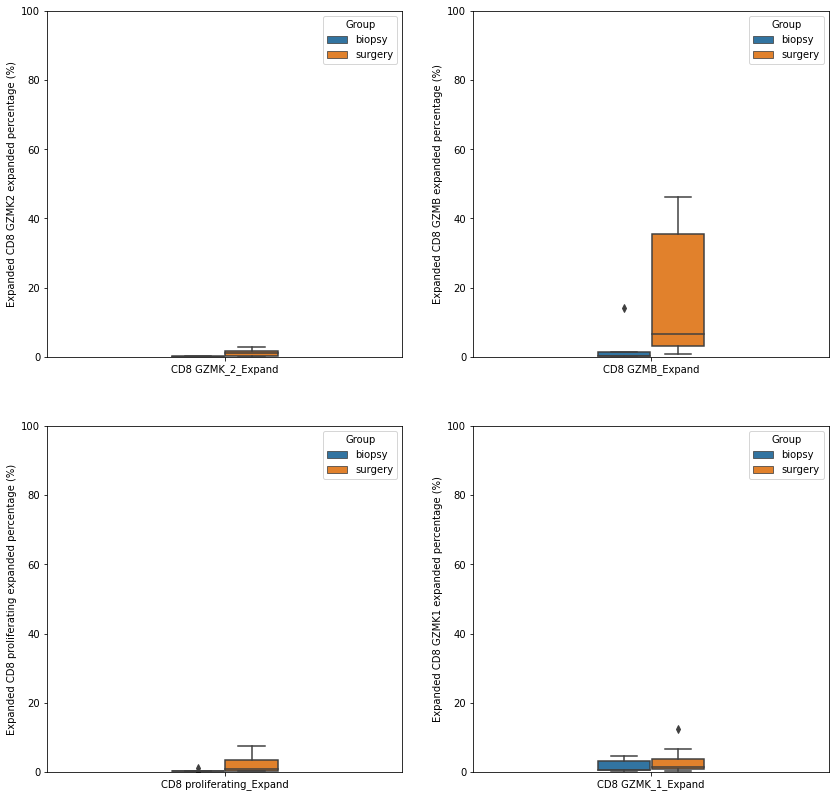

In [157]:
figure=plt.figure(figsize=(14,14))
ax1=figure.add_subplot(221)
#sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_1_NC'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_1_NC'],hue='Group',ax=ax1,width=0.6,showfliers = False)
sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_2_Expand'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_2_Expand'],hue='Group',ax=ax1,width=0.3)
ax1.set_ylim([0,100])
ax1.set_ylabel('Expanded CD8 GZMK2 expanded percentage (%)')
ax2=figure.add_subplot(222)
#sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_1_NC'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_1_NC'],hue='Group',ax=ax1,width=0.6,showfliers = False)
#sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_2_Expand'].index,y='TCR_cell_type',hue_order=['biopsy','surgery'],data=CD8_result_df2.loc['CD8 GZMK_2_Expand'],hue='Group',ax=ax1,width=0.6)
sns.boxplot(x=CD8_result_df2.loc['CD8 GZMB_Expand'].index,y='TCR_cell_type',data=CD8_result_df2.loc['CD8 GZMB_Expand'],hue='Group',ax=ax2,width=0.3)

ax2.set_ylim([0,100])
ax2.set_ylabel('Expanded CD8 GZMB expanded percentage (%)')


ax3=figure.add_subplot(223)
sns.boxplot(x=CD8_result_df2.loc['CD8 proliferating_Expand'].index,y='TCR_cell_type',data=CD8_result_df2.loc['CD8 proliferating_Expand'],hue='Group',ax=ax3,width=0.3)

ax3.set_ylim([0,100])
ax3.set_ylabel('Expanded CD8 proliferating expanded percentage (%)')



ax4=figure.add_subplot(224)
sns.boxplot(x=CD8_result_df2.loc['CD8 GZMK_1_Expand'].index,y='TCR_cell_type',data=CD8_result_df2.loc['CD8 GZMK_1_Expand'],hue='Group',ax=ax4,width=0.3)

ax4.set_ylim([0,100])
ax4.set_ylabel('Expanded CD8 GZMK1 expanded percentage (%)')




#figure.savefig("TCR_T_cell_classification/CD8_GZMK1_NC_percentage_test.svg")

In [159]:
figure.savefig("revised_svg_figures/TCR_expanded.svg")

In [ ]:
CD8 GZMK_1_Expand MannwhitneyuResult(statistic=15.0, pvalue=0.2550337637787672)
CD8 GZMB_NC MannwhitneyuResult(statistic=20.0, pvalue=0.11357334091100751)
CD8 GZMK_2_NC MannwhitneyuResult(statistic=22.0, pvalue=0.15921253335340807)
CD8 proliferating_NC MannwhitneyuResult(statistic=21.0, pvalue=0.13507426636425302)
CD8 GZMK_1_NC MannwhitneyuResult(statistic=16.0, pvalue=0.05178093558826699)
CD8 Trm_NC MannwhitneyuResult(statistic=3.0, pvalue=0.11999252152377249)
CD8 KLRB1_NC MannwhitneyuResult(statistic=32.0, pvalue=0.4790609632888714)
CD8 proliferating_Expand MannwhitneyuResult(statistic=4.0, pvalue=0.01737779217980808)
CD8 GZMB_Expand MannwhitneyuResult(statistic=6.0, pvalue=0.010725366843161034)
CD8 GZMB_Contract MannwhitneyuResult(statistic=21.0, pvalue=0.350739054433307)
CD8 GZMK_2_Expand MannwhitneyuResult(statistic=1.0, pvalue=0.05367326849690552)
CD8 GZMK_1_Contract MannwhitneyuResult(statistic=7.0, pvalue=0.008836138193361215)
CD8 GZMK_2_Contract MannwhitneyuResult(statistic=16.0, pvalue=0.43549559739873167)
CD8 proliferating_Contract MannwhitneyuResult(statistic=5.0, pvalue=0.13517207032739004)
___: CD8 KLRB1_Expand
___: CD8 Trm_Expand
___: CD8 Trm_Contract
___: CD8 KLRB1_Contract

In [160]:
all_sig_TCR=pd.read_pickle("TCR_analysis/all_sig_TCR.pkl")

In [162]:
labeled_all_TCR=pd.read_pickle("TCR_analysis/labeled_TCR.pkl")

In [164]:
colors={'No change':'#808080','Contracted':'blue','Expanded':'red','Novel':'yellow'}

markers={'No change':".",'Contracted':'v','Expanded':'^','Novel':'^'}

In [166]:
labeled_all_TCR['Clone_status'].value_counts()

Non_sig       25575
Novel           129
Contracted      129
Expanded         60
Name: Clone_status, dtype: int64

In [167]:
non_sig_TCR=labeled_all_TCR.loc[labeled_all_TCR['Clone_status']=="Non_sig"].copy()
sig_TCR_df=labeled_all_TCR.loc[labeled_all_TCR['Clone_status']!="Non_sig"].copy()

In [534]:
non_sig_TCR.to_pickle("non_sig_TCR.pkl")
sig_TCR_df.to_pickle("sig_TCR.pkl")

In [545]:
sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Expanded'].shape

(60, 10)

In [560]:
sig_TCR_df[['biopsy_eff','surgery_eff','Clone_status']].shape

(318, 3)

In [558]:
non_sig_TCR[['biopsy_eff','surgery_eff','Clone_status']].shape

(25575, 3)

In [562]:
TCR_Stest_info=pd.concat([non_sig_TCR[['biopsy_eff','surgery_eff','Clone_status']],sig_TCR_df[['biopsy_eff','surgery_eff','Clone_status']]])

In [568]:
TCR_Stest_info.to_pickle("TCR_analysis/TCR_Stest_info.pkl")

In [1]:
import pandas as pd

In [3]:
TCR_Stest_info=pd.read_pickle("TCR_analysis/TCR_Stest_info.pkl")

In [5]:
TCR_Stest_info.to_csv("/home/wull01/liver_project/source_data/Figure6A.txt",sep="\t")

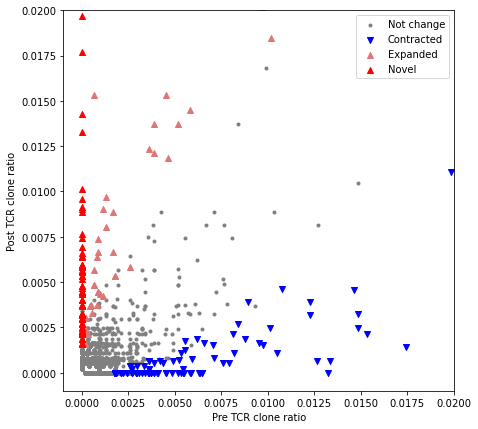

In [554]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
ax1.scatter(non_sig_TCR.biopsy_eff,non_sig_TCR.surgery_eff,color='#808080',marker='.',label='Not change')
ax1.scatter(sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Contracted'].biopsy_eff,sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Contracted'].surgery_eff,color='blue',marker='v',label='Contracted')
ax1.scatter(sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Expanded'].biopsy_eff,sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Expanded'].surgery_eff,color='#dd7777',marker='^',label='Expanded')
ax1.scatter(sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Novel'].biopsy_eff,sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Novel'].surgery_eff,color='red',marker='^',label='Novel')
ax1.set_xlabel('Pre TCR clone ratio')
ax1.set_ylabel('Post TCR clone ratio')
plt.xlim([-0.001,0.02])
plt.ylim([-0.001,0.02])
plt.legend()
figure.savefig("TCR_analysis/expanded_novel_sig_002.svg")

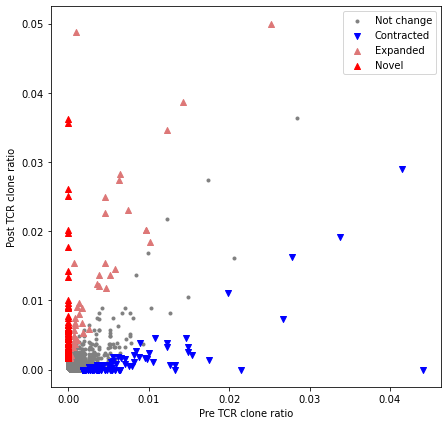

In [171]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
ax1.scatter(non_sig_TCR.biopsy_eff,non_sig_TCR.surgery_eff,color='#808080',marker='.',label='Not change')
ax1.scatter(sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Contracted'].biopsy_eff,sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Contracted'].surgery_eff,color='blue',marker='v',label='Contracted')
ax1.scatter(sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Expanded'].biopsy_eff,sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Expanded'].surgery_eff,color='#dd7777',marker='^',label='Expanded')
ax1.scatter(sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Novel'].biopsy_eff,sig_TCR_df.loc[sig_TCR_df['Clone_status']=='Novel'].surgery_eff,color='red',marker='^',label='Novel')
ax1.set_xlabel('Pre TCR clone ratio')
ax1.set_ylabel('Post TCR clone ratio')
plt.legend()
#figure.savefig("TCR_analysis/expanded_novel_sig.pdf")

In [172]:
figure.savefig("revised_svg_figures/sig_TCR_expanded.svg")

In [173]:
T_cells=sc.read_h5ad('TCR_analysis/T_cells.h5')

In [176]:
T_cells.obs

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,cc_aa_alignment_size,clonotype_modularity,clonotype_modularity_fdr,clonal_expansion,expaned_TCR,Contracted_TCR,Novel_TCR,sig_clonal,expanded_noval,TCR_group
AAACCTGAGAAACGCC-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,2454.0,NaN,...,40,3.627122,3.218380e-36,>= 3,0,0,0,3,0,0
AAACCTGAGTCTCGGC-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,2600.0,NaN,...,1,0.000000,1.000000e+00,1,0,0,0,3,0,0
AAACCTGCAGGATCGA-1-0,False,[],True,True,TRAC,NaN,TRBC2,TRBC1,886.0,NaN,...,1,0.000000,1.000000e+00,1,0,0,0,3,0,0
AAACCTGGTGCAGTAG-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,2672.0,NaN,...,1,0.000000,1.000000e+00,1,0,0,0,3,0,0
AAACCTGTCCTAAGTG-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,1106.0,NaN,...,1,0.000000,1.000000e+00,1,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGAGAGCTC-1-17,False,[],True,True,TRAC,NaN,TRBC2,NaN,710.0,NaN,...,1,0.000000,1.000000e+00,1,0,0,0,3,0,0
TTTGGTTGTCCGTCAG-1-17,False,[],True,True,TRAC,NaN,TRBC2,NaN,1182.0,NaN,...,6,-0.004322,1.000000e+00,>= 3,1,0,0,4,1,1
TTTGGTTTCACCACCT-1-17,False,[],True,True,NaN,NaN,TRBC2,NaN,NaN,NaN,...,3187,0.423165,3.218380e-36,2,0,0,0,3,0,0
TTTGTCACAAAGAATC-1-17,False,[],True,True,TRAC,NaN,TRBC1,NaN,3644.0,NaN,...,9,-0.017209,1.000000e+00,1,0,0,0,3,0,0


In [182]:
?sc.pl.umap

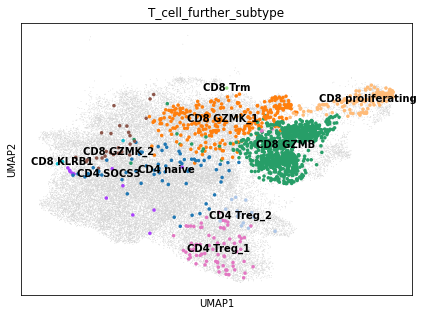

In [183]:
figure=plt.figure(figsize=(7,5))
ax1=figure.add_subplot(111)
sc.pl.umap(T_cells,show=False,ax=ax1)
sc.pl.umap(T_cells[T_cells.obs['expaned_TCR']==1], color='T_cell_further_subtype',ax=ax1,size=50,legend_loc='on data')
figure.savefig("revised_svg_figures/expanded_cell_type.svg")

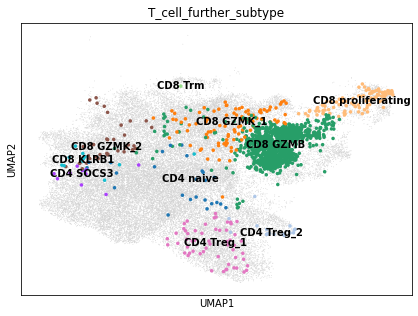

In [184]:
figure=plt.figure(figsize=(7,5))
ax1=figure.add_subplot(111)
sc.pl.umap(T_cells,show=False,ax=ax1)
sc.pl.umap(T_cells[T_cells.obs['Novel_TCR']==1], color='T_cell_further_subtype',ax=ax1,size=50,legend_loc='on data')
figure.savefig("revised_svg_figures/Novel_TCR_cell_type.svg")

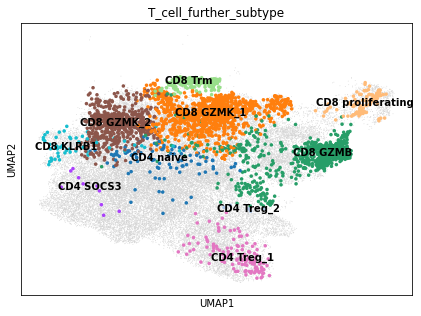

In [185]:
figure=plt.figure(figsize=(7,5))
ax1=figure.add_subplot(111)
sc.pl.umap(T_cells,show=False,ax=ax1)
sc.pl.umap(T_cells[T_cells.obs['Contracted_TCR']==1], color='T_cell_further_subtype',ax=ax1,size=50,legend_loc='on data')
figure.savefig("revised_svg_figures/Contracted_TCR_cell_type.svg")

In [592]:
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype']

In [598]:
?str.replace

In [604]:
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD8 GZMK_1','CD8 GZMK')
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD8 GZMK_2','CD8 GZMK')
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD4 Treg_1','CD4 Treg')
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD4 Treg_2','CD4 CXCL13')

In [631]:
T_cells.obs.groupby(['T_cell_further_subtype2','T_cell_further_subtype']).size()['CD4 CXCL13']

T_cell_further_subtype
CD4 naive               0
CD8 GZMK_1              0
CD8 GZMB                0
CD4 SOCS3               0
CD8 GZMK_2              0
CD4 Treg_1              0
CD8 KLRB1               0
CD4 Treg_2           1777
CD8 proliferating       0
CD8 Trm                 0
dtype: int64

In [607]:
8065+3911

11976

In [605]:
T_cells.obs['T_cell_further_subtype2'].value_counts()

CD4 naive            13126
CD8 GZMK             11976
CD8 GZMB              5921
CD4 SOCS3             5684
CD4 Treg              4523
CD8 KLRB1             2118
CD4 CXCL13            1777
CD8 proliferating     1231
CD8 Trm                311
Name: T_cell_further_subtype2, dtype: int64

In [608]:
T_cell_pre=T_cells[T_cells.obs['treatment']=='xinfu_before'].copy()
T_cell_after=T_cells[T_cells.obs['treatment']=='xinfu_after'].copy()

In [615]:
sample_level_expanded_TCR=[]
for key,value in T_cell_after.obs.groupby(['sample']):
    expanded_value=value.loc[(value['Novel_TCR']==1)|(value['expaned_TCR']==1),].groupby('T_cell_further_subtype2').size()
    expanded_value=expanded_value/expanded_value.sum()
    sample_level_expanded_TCR.append(pd.DataFrame(expanded_value))
    #sample_level_expanded_TCR.append(value.loc[(value['Novel_TCR']==1)|(value['expaned_TCR']==1),].groupby('T_cell_further_subtype').size())
    



In [616]:
sample_level_contracted_TCR=[]
for key,value in T_cell_pre.obs.groupby(['sample']):
    c_value=value.loc[(value['Contracted_TCR']==1),].groupby('T_cell_further_subtype2').size()
    c_value=c_value/c_value.sum()
    sample_level_contracted_TCR.append(pd.DataFrame(c_value))
    #sample_level_expanded_TCR.append(value.loc[(value['Novel_TCR']==1)|(value['expaned_TCR']==1),].groupby('T_cell_further_subtype').size())




In [618]:
sample_level_contracted_TCR[3]

,0
T_cell_further_subtype2,
CD4 SOCS3,0.011547
CD4 Treg,0.013857
CD4 naive,0.062356
CD8 GZMK,0.845266
CD8 KLRB1,0.066975


In [619]:
Contracted_TCR=pd.concat(sample_level_contracted_TCR)
Contracted_TCR.dropna(inplace=True)
Contracted_TCR.columns=['Fraction']
Contracted_TCR['Cell type']=Contracted_TCR.index



In [620]:
Contracted_TCR.to_pickle("revised_svg_figures/Contracted_TCR_cell_type.pkl")
TCR_expaned_cell_type.to_pickle("revised_svg_figures/TCR_expaned_cell_type.pkl")

In [49]:
Contracted_TCR=pd.read_pickle("revised_svg_figures/Contracted_TCR_cell_type.pkl")
TCR_expaned_cell_type=pd.read_pickle("revised_svg_figures/TCR_expaned_cell_type.pkl")

In [621]:
#Contracted_TCR['Cell type']=Contracted_TCR['Cell type'].astype(str)

#Contracted_TCR.loc['CD8 GZMK_1','Cell type']='CD8 GZMK'
#Contracted_TCR.loc['CD8 GZMK_2','Cell type']='CD8 GZMK'

#Contracted_TCR.loc['CD4 Treg_2','Cell type']='CD4 CXCL13'

#Contracted_TCR.loc['CD4 Treg_1','Cell type']='CD4 Treg'

#Contracted_TCR

In [48]:
tcell_order=['CD8 GZMB','CD8 GZMK','CD8 proliferating','CD8 KLRB1','CD8 Trm','CD4 naive',"CD4 Treg","CD4 CXCL13","CD4 SOCS3"]

In [50]:
Contracted_TCR.to_csv("source_data/Figure6C_up.txt",sep="\t")
TCR_expaned_cell_type.to_csv("source_data/Figure6C_down.txt",sep="\t")

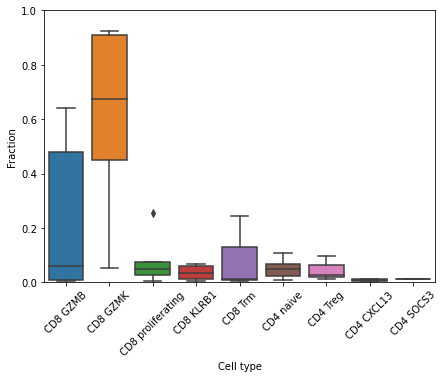

In [634]:
figure=plt.figure(figsize=(7,5))
ax1=figure.add_subplot(111)
sns.boxplot(x='Cell type',y='Fraction',data=Contracted_TCR,ax=ax1,order=tcell_order)
ax1.set_ylim([0,1])
plt.xticks(rotation=45)
figure.savefig("revised_svg_figures/contracted_clone_boxplot_update.svg")

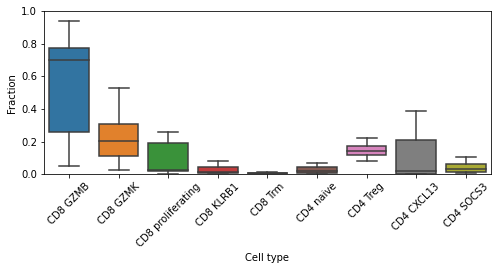

In [633]:
TCR_expaned_cell_type=pd.concat(sample_level_expanded_TCR)
TCR_expaned_cell_type.columns=['Fraction']
TCR_expaned_cell_type['Cell type']=TCR_expaned_cell_type.index

TCR_expaned_cell_type_sorted=TCR_expaned_cell_type.sort_values(by='Fraction')
figure=plt.figure(figsize=(8,3))
ax1=figure.add_subplot(111)
sns.boxplot(x='Cell type',y='Fraction',data=TCR_expaned_cell_type_sorted,ax=ax1,order=tcell_order)
ax1.set_ylim([0,1])
plt.xticks(rotation=45)
figure.savefig("revised_svg_figures/TCR_expaned_cell_type.svg")

In [195]:
##
T_cell_CD8_normalized_obs=pd.read_csv("statistics/CD8T_pseudotime/CD8_exhausted_cytotic.txt",sep="\t",index_col=0)

In [196]:
T_cell_CD8_normalized_obs.head()

,exhausted_score,cytotic_score
AAACCTGAGAAACGCC-1-0,-0.132866,1.060581
AAACCTGAGTCTCGGC-1-0,-0.259115,0.290345
AAACCTGGTGCAGTAG-1-0,-0.536328,0.182354
AAACGGGAGGCCCGTT-1-0,-0.185273,1.249607
AAACGGGAGTGGGATC-1-0,0.240184,0.781708


In [409]:
#T_cell_CD8_score
T_cell_CD8_normalized_obs=pd.read_csv("statistics/CD8T_pseudotime/CD8_exhausted_cytotic.txt",sep="\t",index_col=0)

In [17]:
#sc.write("T_Cell_new_type/T_cells_TCR_CLASS.h5",T_cells)
T_cells=sc.read('T_Cell_new_type/T_cells_TCR_CLASS.h5')

KeyboardInterrupt: 

In [16]:
T_cell_CD8_normalized_obs.shape

NameError: name 'T_cell_CD8_normalized_obs' is not defined

In [440]:
T_cell_CD8=T_cells[T_cells.obs['T_cell_further_subtype'].isin(['CD8 GZMK_1','CD8 GZMB','CD8 GZMK_2','CD8 KLRB1','CD8 proliferating','CD8 Trm'])].copy()

In [441]:
T_cell_CD8_obs=T_cell_CD8.obs

In [442]:
T_cell_3=T_cell_CD8_obs.loc[T_cell_CD8_obs['T_cell_further_subtype'].isin(['CD8 GZMK_1','CD8 GZMB','CD8 GZMK_2','CD8 proliferating'])].copy()

In [443]:
T_cell_3_scores=pd.merge(T_cell_3,T_cell_CD8_normalized_obs,left_index=True,right_index=True)

In [444]:
T_cell_3_scores.shape

(19128, 114)

In [445]:
T_cell_3_scores['new_type']=T_cell_3_scores.apply(lambda x:'CD8 GZMK' if(x['T_cell_further_subtype']=='CD8 GZMK_1' or x['T_cell_further_subtype']=='CD8 GZMK_2') else x['T_cell_further_subtype'],axis=1)

In [446]:
T_cell_3_scores['new_type'].value_counts()

CD8 GZMK             11976
CD8 GZMB              5921
CD8 proliferating     1231
Name: new_type, dtype: int64

In [447]:
#T_cell_3_scores['T_cell_further_subtype'].value_counts()

In [449]:
T_cell_3_scores['TCR_cell_type3']=T_cell_3_scores.apply(lambda x:x['new_type']+'_'+x['TCR_info2'],axis=1)

In [451]:
pre=T_cell_3_scores.loc[T_cell_3_scores['treatment']=='xinfu_before'].copy()
post=T_cell_3_scores.loc[T_cell_3_scores['treatment']=='xinfu_after'].copy()

In [473]:
T_cell_3_scores.to_pickle("RNA_velocity_GZMB/T_cell_3_scores.pkl")

In [60]:
T_cell_3_scores=pd.read_pickle("RNA_velocity_GZMB/T_cell_3_scores.pkl")

In [ ]:
###GZMB_well


In [471]:
T_cell_3_scores['ids']=T_cell_3_scores.index

In [804]:
pre.to_pickle("TCR_analysis/pre_expanded_contract_NC.pkl")
post.to_pickle("TCR_analysis/post_expanded_contract_NC.pkl")

In [51]:
pre=pd.read_pickle("TCR_analysis/pre_expanded_contract_NC.pkl")
post=pd.read_pickle("TCR_analysis/post_expanded_contract_NC.pkl")

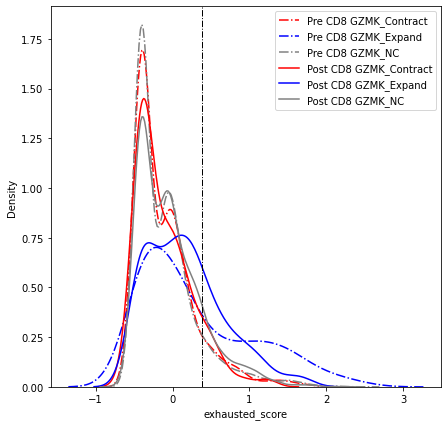

In [455]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMK_Contract','exhausted_score'],ax=ax1,label='Pre CD8 GZMK_Contract',linestyle='-.',color='r')
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMK_Expand','exhausted_score'],ax=ax1,label='Pre CD8 GZMK_Expand',linestyle='-.',color='blue')
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMK_NC','exhausted_score'],ax=ax1,label='Pre CD8 GZMK_NC',linestyle='-.',color='grey')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMK_Contract','exhausted_score'],ax=ax1,label='Post CD8 GZMK_Contract',color='r')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMK_Expand','exhausted_score'],ax=ax1,label='Post CD8 GZMK_Expand',color='blue')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMK_NC','exhausted_score'],ax=ax1,label='Post CD8 GZMK_NC',color='grey')

plt.legend()
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)

In [456]:
figure.savefig("Revision_plot/GZMK_expanded_exhuasted_score.svg")

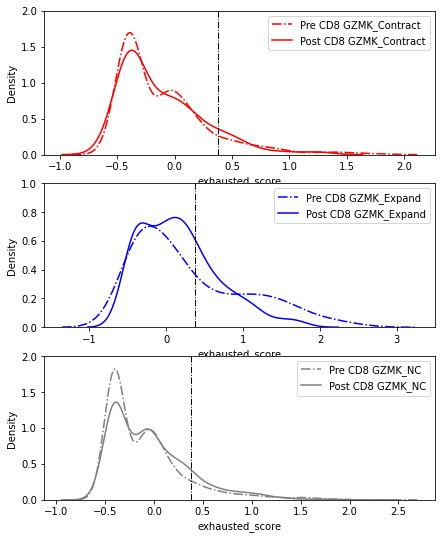

In [796]:
figure=plt.figure(figsize=(7,9))
ax1=figure.add_subplot(311)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMK_Contract','exhausted_score'],ax=ax1,label='Pre CD8 GZMK_Contract',linestyle='-.',color='r')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMK_Contract','exhausted_score'],ax=ax1,label='Post CD8 GZMK_Contract',color='r')
plt.ylim([0,2])
plt.legend()
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)
ax2=figure.add_subplot(312)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMK_Expand','exhausted_score'],ax=ax2,label='Pre CD8 GZMK_Expand',linestyle='-.',color='blue')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMK_Expand','exhausted_score'],ax=ax2,label='Post CD8 GZMK_Expand',color='blue')
plt.legend()
plt.ylim([0,1.0])
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)
ax3=figure.add_subplot(313)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMK_NC','exhausted_score'],ax=ax3,label='Pre CD8 GZMK_NC',linestyle='-.',color='grey')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMK_NC','exhausted_score'],ax=ax3,label='Post CD8 GZMK_NC',color='grey')

plt.legend()
plt.ylim([0,2.0])
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)


In [797]:
figure.savefig("Revision_plot/GZMK_three_stage_exhuasted.svg")

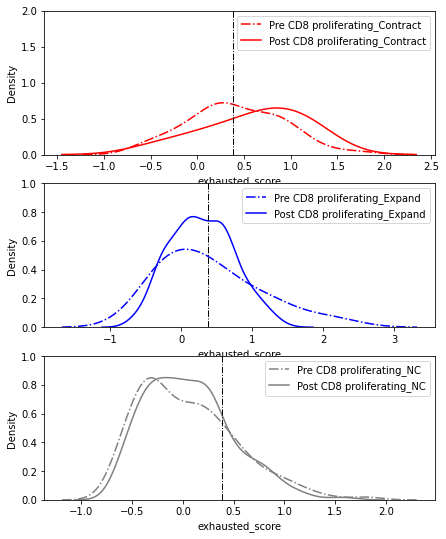

In [799]:
figure=plt.figure(figsize=(7,9))
ax1=figure.add_subplot(311)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 proliferating_Contract','exhausted_score'],ax=ax1,label='Pre CD8 proliferating_Contract',linestyle='-.',color='r')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 proliferating_Contract','exhausted_score'],ax=ax1,label='Post CD8 proliferating_Contract',color='r')
plt.ylim([0,2])
plt.legend()
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)
ax2=figure.add_subplot(312)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 proliferating_Expand','exhausted_score'],ax=ax2,label='Pre CD8 proliferating_Expand',linestyle='-.',color='blue')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 proliferating_Expand','exhausted_score'],ax=ax2,label='Post CD8 proliferating_Expand',color='blue')
plt.legend()
plt.ylim([0,1.0])
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)
ax3=figure.add_subplot(313)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 proliferating_NC','exhausted_score'],ax=ax3,label='Pre CD8 proliferating_NC',linestyle='-.',color='grey')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 proliferating_NC','exhausted_score'],ax=ax3,label='Post CD8 proliferating_NC',color='grey')

plt.legend()
plt.ylim([0,1.0])
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)



In [793]:
pre['TCR_cell_type3'].value_counts()

CD8 GZMK_NC                   7663
CD8 GZMB_NC                   1693
CD8 GZMK_Contract             1390
CD8 GZMB_Contract              744
CD8 proliferating_NC           399
CD8 GZMB_Expand                173
CD8 GZMK_Expand                156
CD8 proliferating_Contract      91
CD8 proliferating_Expand        16
Name: TCR_cell_type3, dtype: int64

In [800]:
figure.savefig("Revision_plot/proliferating_three_stage_exhuasted.svg")

In [54]:
pre.loc[pre['TCR_cell_type3']=='CD8 GZMB_Expand',['exhausted_score']].to_csv("source_data/Figure6E_pre.txt",sep="\t")
post.loc[post['TCR_cell_type3']=='CD8 GZMB_Expand',['exhausted_score']].to_csv("source_data/Figure6E_post.txt",sep="\t")

In [74]:
pre.loc[pre['TCR_cell_type3']=='CD8 GZMB_Contract',['exhausted_score']].to_csv("source_data/FigureS6F_pre_contracted.txt",sep="\t")
post.loc[post['TCR_cell_type3']=='CD8 GZMB_Contract',['exhausted_score']].to_csv("source_data/FigureS6F_post_contracted.txt",sep="\t")
pre.loc[pre['TCR_cell_type3']=='CD8 GZMB_NC',['exhausted_score']].to_csv("source_data/FigureS6F_pre_NC.txt",sep="\t")
post.loc[post['TCR_cell_type3']=='CD8 GZMB_NC',['exhausted_score']].to_csv("source_data/FigureS6F_post_NC.txt",sep="\t")

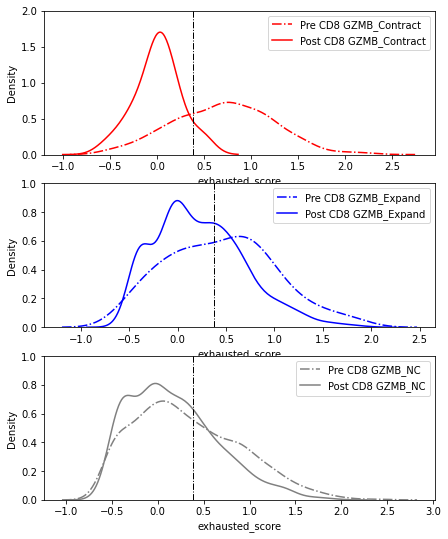

In [801]:
figure=plt.figure(figsize=(7,9))
ax1=figure.add_subplot(311)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMB_Contract','exhausted_score'],ax=ax1,label='Pre CD8 GZMB_Contract',linestyle='-.',color='r')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMB_Contract','exhausted_score'],ax=ax1,label='Post CD8 GZMB_Contract',color='r')
plt.ylim([0,2])
plt.legend()
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)
ax2=figure.add_subplot(312)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMB_Expand','exhausted_score'],ax=ax2,label='Pre CD8 GZMB_Expand',linestyle='-.',color='blue')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMB_Expand','exhausted_score'],ax=ax2,label='Post CD8 GZMB_Expand',color='blue')
plt.legend()
plt.ylim([0,1.0])
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)
ax3=figure.add_subplot(313)
sns.kdeplot(pre.loc[pre['TCR_cell_type3']=='CD8 GZMB_NC','exhausted_score'],ax=ax3,label='Pre CD8 GZMB_NC',linestyle='-.',color='grey')
sns.kdeplot(post.loc[post['TCR_cell_type3']=='CD8 GZMB_NC','exhausted_score'],ax=ax3,label='Post CD8 GZMB_NC',color='grey')

plt.legend()
plt.ylim([0,1.0])
plt.axvline(x=0.38,linestyle='-.',c='black',linewidth=1)




In [529]:
figure.savefig("Revision_plot/GZMB_three_stage_exhuasted.svg")

In [802]:
%pwd

'/OceanStor100D/home/sunyidi_lab/llwu/liver_project'

In [55]:
T_cell_all=sc.read_h5ad("statistics/h5data/adata_T_defined.h5ad")

In [56]:
T_cell_all_raw=T_cell_all.raw.to_adata()

In [57]:
exhausted_marker=['CTLA4', 'HAVCR2', 'LAG3', 'PDCD1', 'TIGIT']
cytotocity_marker=['PRF1', 'IFNG', 'GNLY', 'NKG7', 'GZMK','GZMA', 'CST7','TNFSF10']

In [58]:
sc.tl.score_genes(T_cell_all_raw,exhausted_marker,score_name='exhausted_score')
sc.tl.score_genes(T_cell_all_raw,cytotocity_marker,score_name='cytotic_score')

In [461]:
T_cell_3_scores.head()

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,expanded_noval,TCR_group,TCR_info,TCR_cell_type,TCR_info2,TCR_cell_type2,exhausted_score,cytotic_score,new_type,TCR_cell_type3
AAACCTGAGAAACGCC-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,2454.0,NaN,...,0,0,NC,CD8 GZMK_2_NC,NC,CD8 GZMK_2_NC,-0.132866,1.060581,CD8 GZMK,CD8 GZMK_NC
AAACGGGAGGCCCGTT-1-0,False,[],True,True,TRAC,NaN,TRBC1,NaN,3552.0,NaN,...,0,0,NC,CD8 GZMK_1_NC,NC,CD8 GZMK_1_NC,-0.185273,1.249607,CD8 GZMK,CD8 GZMK_NC
AAACGGGAGTGGGATC-1-0,False,[],True,True,TRAC,NaN,TRBC1,NaN,1370.0,NaN,...,0,0,NC,CD8 GZMK_2_NC,NC,CD8 GZMK_2_NC,0.240184,0.781708,CD8 GZMK,CD8 GZMK_NC
AAACGGGAGTTGTCGT-1-0,False,[],True,True,TRAC,NaN,TRBC2,NaN,1786.0,NaN,...,0,0,NC,CD8 GZMK_2_NC,NC,CD8 GZMK_2_NC,0.118421,1.120421,CD8 GZMK,CD8 GZMK_NC
AAACGGGCACACCGCA-1-0,False,[],True,True,NaN,NaN,TRBC1,NaN,NaN,NaN,...,0,0,NC,CD8 GZMK_2_NC,NC,CD8 GZMK_2_NC,-0.456991,0.971219,CD8 GZMK,CD8 GZMK_NC


In [67]:
T_cell_3_scores['new_type'].value_counts()

CD8 GZMK             11976
CD8 GZMB              5921
CD8 proliferating     1231
Name: new_type, dtype: int64

In [69]:
T_cell_3_scores.loc[T_cell_3_scores['new_type'].isin(['CD8 GZMB','CD8 GZMK','CD8 proliferating']),['cytotic_score','new_type']].to_csv('source_data/Figure6J_left.txt',sep="\t")


In [71]:
T_cell_all_raw.obs.loc[T_cell_all_raw.obs['T_cell_further_subtype'].str.startswith('CD4'),['cytotic_score','T_cell_further_subtype']].to_csv('source_data/Figure6J_left_ref.txt',sep="\t")

Text(0.5, 1.0, 'Cell type cytotic_score')

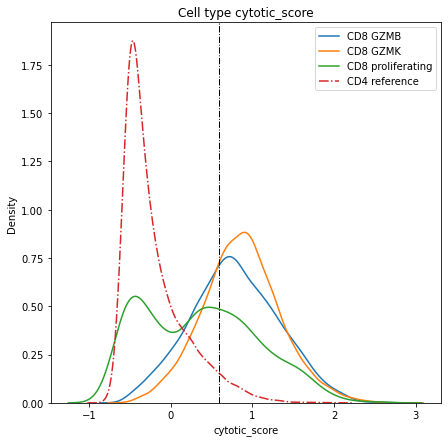

In [61]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMB','cytotic_score'],ax=ax1,label='CD8 GZMB')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK','cytotic_score'],ax=ax1,label='CD8 GZMK')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK_2','cytotic_score'],ax=ax1,label='CD8 GZMK_2')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 proliferating','cytotic_score'],ax=ax1,label='CD8 proliferating')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 KLRB1','cytotic_score'],ax=ax1,label='CD8 KLRB1')
sns.kdeplot(T_cell_all_raw.obs.loc[T_cell_all_raw.obs['T_cell_further_subtype'].str.startswith('CD4'),'cytotic_score'],ax=ax1,linestyle='-.',label='CD4 reference')


#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 Trm','cytotic_score'],ax=ax1,label='CD8 Trm')
plt.axvline(x=0.59,linestyle='-.',c='black',linewidth=1)


plt.legend()
plt.title('Cell type cytotic_score')

In [73]:
T_cell_3_scores.loc[T_cell_3_scores['new_type'].isin(['CD8 GZMB','CD8 GZMK','CD8 proliferating']),['exhausted_score','new_type']].to_csv('source_data/Figure6J_left_exhuasted.txt',sep="\t")

T_cell_all_raw.obs.loc[T_cell_all_raw.obs['T_cell_further_subtype'].str.startswith('CD4'),['exhausted_score','T_cell_further_subtype']].to_csv('source_data/Figure6J_left_ref_exhuasted.txt',sep="\t")

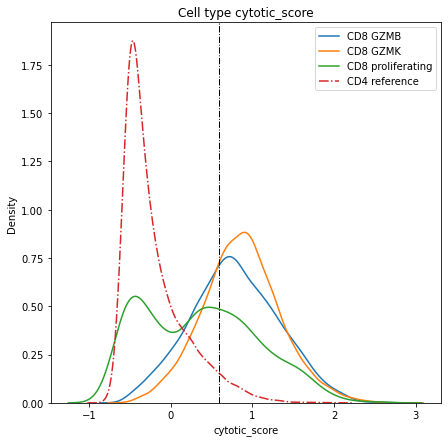

In [466]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMB','cytotic_score'],ax=ax1,label='CD8 GZMB')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK','cytotic_score'],ax=ax1,label='CD8 GZMK')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK_2','cytotic_score'],ax=ax1,label='CD8 GZMK_2')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 proliferating','cytotic_score'],ax=ax1,label='CD8 proliferating')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 KLRB1','cytotic_score'],ax=ax1,label='CD8 KLRB1')
sns.kdeplot(T_cell_all_raw.obs.loc[T_cell_all_raw.obs['T_cell_further_subtype'].str.startswith('CD4'),'cytotic_score'],ax=ax1,linestyle='-.',label='CD4 reference')


#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 Trm','cytotic_score'],ax=ax1,label='CD8 Trm')
plt.axvline(x=0.59,linestyle='-.',c='black',linewidth=1)


plt.legend()
plt.title('Cell type cytotic_score')
figure.savefig("Revision_plot/cytotic_score.svg")

Text(0.5, 1.0, 'Cell type Exhausted_score')

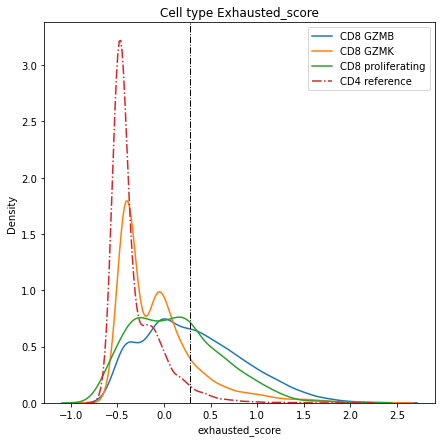

In [72]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMB','exhausted_score'],ax=ax1,label='CD8 GZMB')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK','exhausted_score'],ax=ax1,label='CD8 GZMK')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK_2','exhausted_score'],ax=ax1,label='CD8 GZMK_2')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 proliferating','exhausted_score'],ax=ax1,label='CD8 proliferating')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 KLRB1','exhausted_score'],ax=ax1,label='CD8 KLRB1')
sns.kdeplot(T_cell_all_raw.obs.loc[T_cell_all_raw.obs['T_cell_further_subtype'].isin(['CD4 SOCS3','CD4 naive']),'exhausted_score'],ax=ax1,linestyle='-.',label='CD4 reference')


#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 Trm','exhausted_score'],ax=ax1,label='CD8 Trm')

plt.axvline(x=0.28,linestyle='-.',c='black',linewidth=1)


plt.legend()
plt.title('Cell type Exhausted_score')

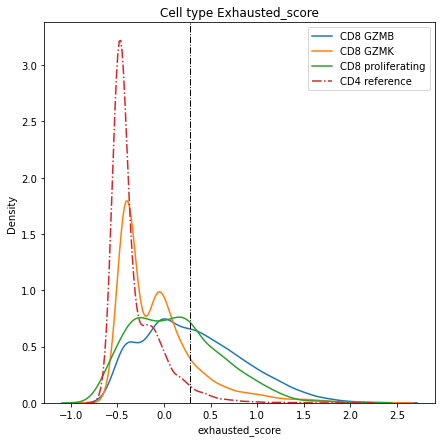

In [464]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMB','exhausted_score'],ax=ax1,label='CD8 GZMB')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK','exhausted_score'],ax=ax1,label='CD8 GZMK')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 GZMK_2','exhausted_score'],ax=ax1,label='CD8 GZMK_2')
sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 proliferating','exhausted_score'],ax=ax1,label='CD8 proliferating')
#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 KLRB1','exhausted_score'],ax=ax1,label='CD8 KLRB1')
sns.kdeplot(T_cell_all_raw.obs.loc[T_cell_all_raw.obs['T_cell_further_subtype'].isin(['CD4 SOCS3','CD4 naive']),'exhausted_score'],ax=ax1,linestyle='-.',label='CD4 reference')


#sns.kdeplot(T_cell_3_scores.loc[T_cell_3_scores['new_type']=='CD8 Trm','exhausted_score'],ax=ax1,label='CD8 Trm')

plt.axvline(x=0.28,linestyle='-.',c='black',linewidth=1)


plt.legend()
plt.title('Cell type Exhausted_score')
figure.savefig("Revision_plot/exhausted_score.svg")

In [729]:
###T cell umap
T_cells=sc.read_h5ad("/OceanStor100D/home/sunyidi_lab/sunyn/liver_project/analysed_data/T_analysed.h5ad")

In [730]:
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype']

T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD8 GZMK_2','CD8 GZMK')
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace('CD8 GZMK_1','CD8 GZMK')

In [731]:
T_cells.obs.groupby('T_cell_further_subtype').size()

T_cell_further_subtype
CD4 naive            14948
CD8 GZMK_1           10007
CD8 GZMB              7156
NK_1                  7155
CD4 SOCS3             6779
CD8 GZMK_2            5551
CD4 Treg_1            5140
NK_2                  3960
CD8 KLRB1             3061
CD4 Treg_2            1988
CD8 proliferating     1896
CD8 Trm                461
gdT                    322
dtype: int64

In [732]:
T_cells.obs.groupby('T_cell_further_subtype2').size()

T_cell_further_subtype2
CD4 SOCS3             6779
CD4 Treg_1            5140
CD4 Treg_2            1988
CD4 naive            14948
CD8 GZMB              7156
CD8 GZMK             15558
CD8 KLRB1             3061
CD8 Trm                461
CD8 proliferating     1896
NK_1                  7155
NK_2                  3960
gdT                    322
dtype: int64

In [665]:
T_cells.obs['T_cell_further_subtype'].cat.categories

Index(['CD4 naive', 'CD8 GZMK_1', 'CD8 GZMB', 'NK_1', 'CD4 SOCS3',
       'CD8 GZMK_2', 'CD4 Treg_1', 'NK_2', 'CD8 KLRB1', 'CD4 Treg_2',
       'CD8 proliferating', 'CD8 Trm', 'gdT'],
      dtype='object')

In [733]:
T_cell_subtype_color_dict={}
for key,value in zip(list(T_cells.uns['T_cell_further_subtype_colors']),list(T_cells.obs['T_cell_further_subtype'].cat.categories)):
    T_cell_subtype_color_dict[value]=key

... storing 'T_cell_further_subtype2' as categorical


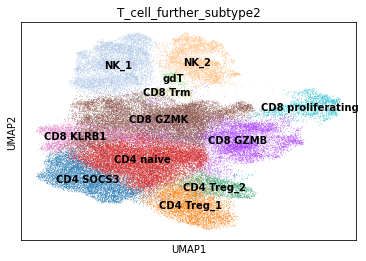

In [736]:
sc.pl.umap(T_cells,color='T_cell_further_subtype2',legend_loc='on data')

In [747]:
lymph_color=open("lymph_color.txt",'w+')
for key,value in T_cell_subtype_color_dict.items():
    print(key,value,file=lymph_color,sep="\t")
lymph_color.close()

In [737]:
T_cell_further_subtype2_color=[]
for value in T_cells.obs.T_cell_further_subtype2.cat.categories:
    if value in T_cell_subtype_color_dict:
        T_cell_further_subtype2_color.append(T_cell_subtype_color_dict[value])
    else:
        T_cell_further_subtype2_color.append(T_cell_subtype_color_dict['CD8 GZMK_1'])

In [738]:
T_cells.uns['T_cell_further_subtype2_colors']=T_cell_further_subtype2_color

In [739]:
T_cells.obs.T_cell_further_subtype2.cat.categories

Index(['CD4 SOCS3', 'CD4 Treg_1', 'CD4 Treg_2', 'CD4 naive', 'CD8 GZMB',
       'CD8 GZMK', 'CD8 KLRB1', 'CD8 Trm', 'CD8 proliferating', 'NK_1', 'NK_2',
       'gdT'],
      dtype='object')

In [740]:
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace("CD4 Treg_2","CD4 CXCL13")
T_cells.obs['T_cell_further_subtype2']=T_cells.obs['T_cell_further_subtype2'].str.replace("CD4 Treg_1","CD4 Treg")

In [744]:
sc.write("./analysis_result/T_analysed_GZMK12.h5ad",T_cells)

... storing 'T_cell_further_subtype2' as categorical


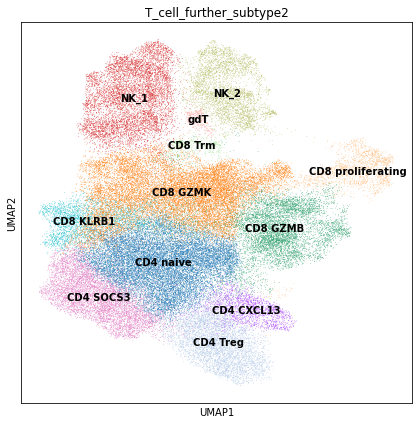

In [741]:
figure=plt.figure(figsize=(7,7))
ax=figure.add_subplot(111)
sc.pl.umap(T_cells,color='T_cell_further_subtype2',ax=ax,legend_loc='on data')
figure.savefig("Revision_plot/T_cells_subtype_umap.svg")

In [671]:
#?sc.pl.umap

In [787]:
###TCR GZMK_1 GZMK_2
T_further_markers={# 'CD4 naive': ['IL7R', 'LTB’,'CCR7'],
'CD4 naive': ['IL7R', 'LTB','CCR7'],
'CD8 GZMK': ['GZMK', 'GZMA', 'ITM2C'],
                    #'CD8 GZMK_2': ['GZMK', 'TNFSF9', 'EGR1'],
'CD8 GZMB': ['GZMB', 'RGS1'],
'NK_1': ['GNLY', 'FGFBP2', 'FCGR3A'],
'NK_2': ['TYROBP', 'FCER1G', 'TRDC'],
                    #’CD8 KLRB1': ['KLRB1', 'TRAV1-2', 'TNF', 'NCR3'],
'CD8 KLRB1': ['KLRB1', 'TRAV1-2', 'NCR3'],

'CD4 Treg': ['FOXP3', 'BATF', 'TIGIT'],
                    #’CD4 CXCL3': ['CXCL13', 'CTLA4', 'PDCD1', 'ICOS'],
'CD4 CXCL3': ['CXCL13', 'CTLA4', 'PDCD1'],

'CD4 SOCS3': ['SOCS3', 'SLC2A3', 'CD55'],
'CD8 proliferating': ['STMN1', 'TYMS', 'MKI67'],
'CD8 Trm': ['ZNF683', 'KLRC3', 'KLRC2'],
'gdT':['TRGV9','KIT','SPINK2']}
                    #’gdT': ['TRGV9', 'KIT', 'SPINK2']}



In [763]:
#print(T_cells.raw.X)

In [764]:
sc.tl.rank_genes_groups(T_cells, 'T_cell_further_subtype2', method='t-test')

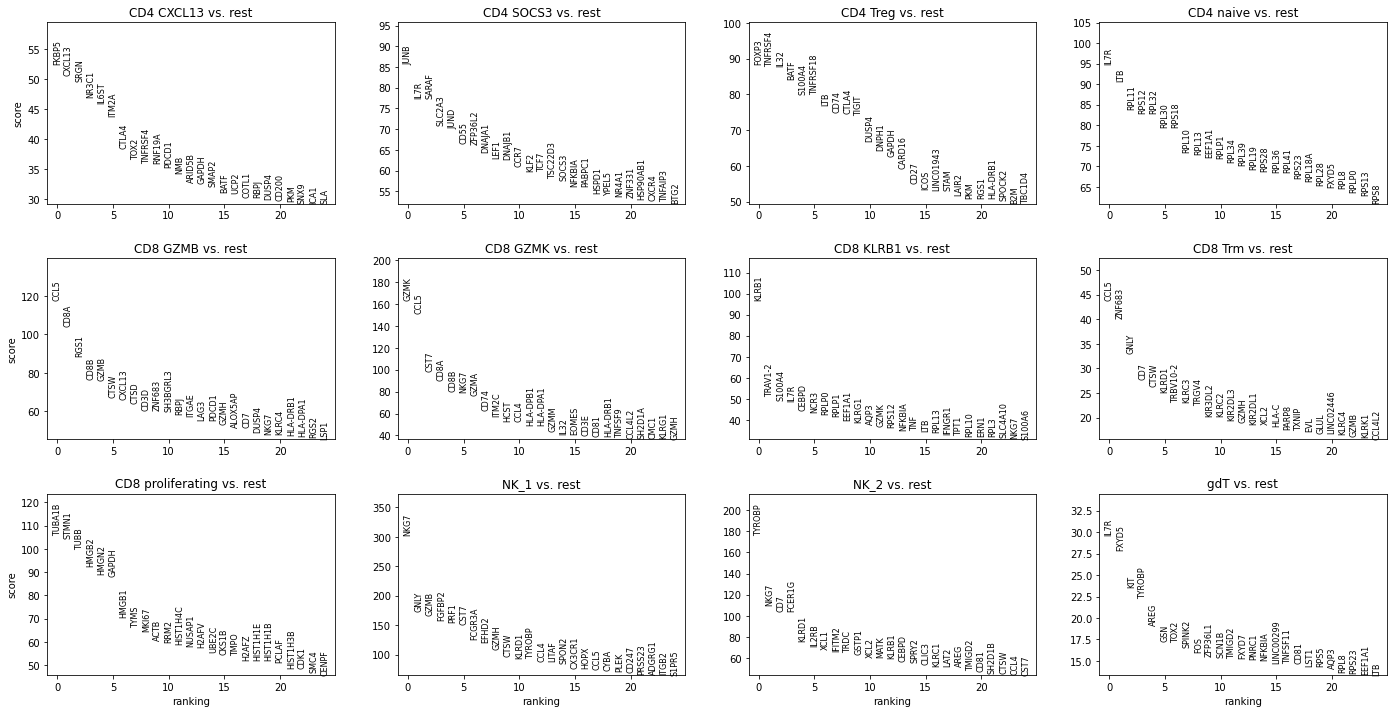

In [765]:
sc.pl.rank_genes_groups(T_cells, n_genes=25, sharey=False)

In [786]:
?sc.pl.heatmap

categories: CD4 CXCL13, CD4 SOCS3, CD4 Treg, etc.
var_group_labels: CD4 naive, CD8 GZMK, CD8 GZMB, etc.


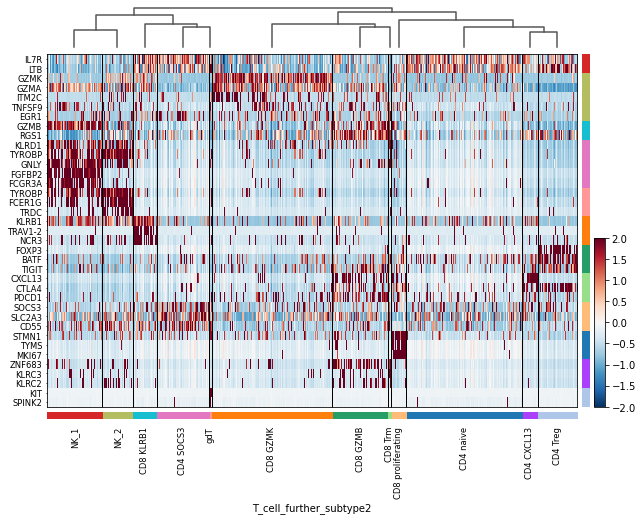

In [785]:
T_cells.layers['scaled'] = sc.pp.scale(T_cells, copy=True).X


In [ ]:
T_cells.obs.cat.ca

In [ ]:
T_cells.

categories: CD4 CXCL13, CD4 SOCS3, CD4 Treg, etc.
var_group_labels: CD4 naive, CD8 GZMK, CD8 GZMB, etc.


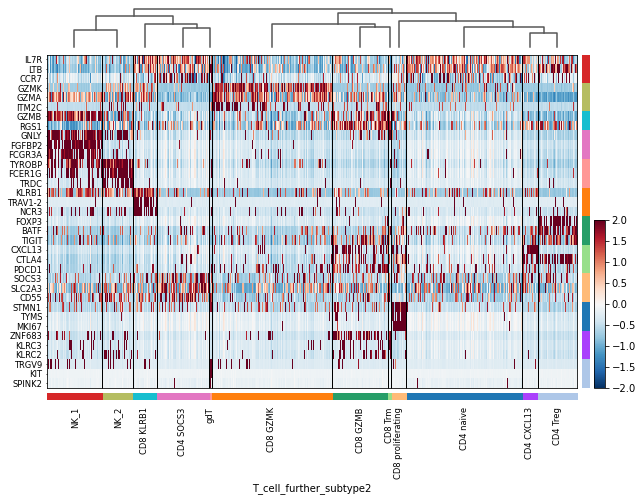

In [790]:
sc.pl.heatmap(T_cells, T_further_markers, groupby='T_cell_further_subtype2', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True)

In [783]:
for key in  T_cells.var_names:
    if key.startswith('FX'):
        print(key)

FXYD4
FXYD2
FXYD6
FXYD7


In [18]:
###exhuasted score
combined_T=sc.read_h5ad("./analysis_result/T_analysed_GZMK12.h5ad")

In [19]:
exhausted_marker=['CTLA4', 'HAVCR2', 'LAG3', 'PDCD1', 'TIGIT']
cytotocity_marker=['PRF1', 'IFNG', 'GNLY', 'NKG7', 'GZMK','GZMA', 'CST7','TNFSF10']

In [21]:
combined_T.obs['T_cell_further_subtype2'].value_counts()

CD8 GZMK             15558
CD4 naive            14948
CD8 GZMB              7156
NK_1                  7155
CD4 SOCS3             6779
CD4 Treg              5140
NK_2                  3960
CD8 KLRB1             3061
CD4 CXCL13            1988
CD8 proliferating     1896
CD8 Trm                461
gdT                    322
Name: T_cell_further_subtype2, dtype: int64

In [22]:
combined_T_CD8=combined_T[combined_T.obs['T_cell_further_subtype2'].isin(['CD8 GZMK','CD8 GZMB','CD8 KLRB1','CD8 proliferating','CD8 Trm'])].copy()

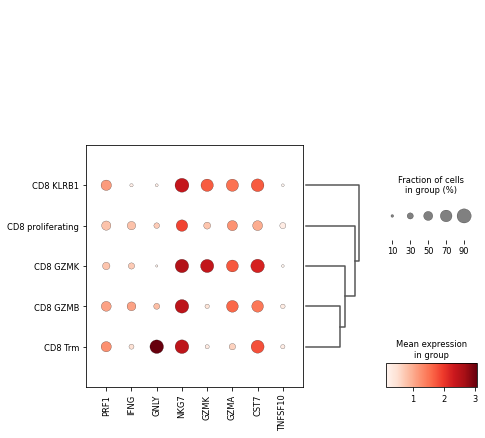

In [23]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
#cytotocity_marker=['PRF1', 'IFNG', 'GNLY', 'NKG7', 'GZMK','GZMA', 'CST7','TNFSF10']
sc.tl.dendrogram(combined_T_CD8, groupby="T_cell_further_subtype2")
sc.pl.dotplot(combined_T_CD8, cytotocity_marker, 'T_cell_further_subtype2', dendrogram=True,ax=ax1)
figure.savefig("TCR_analysis/all_celltype_cytotocity.svg")



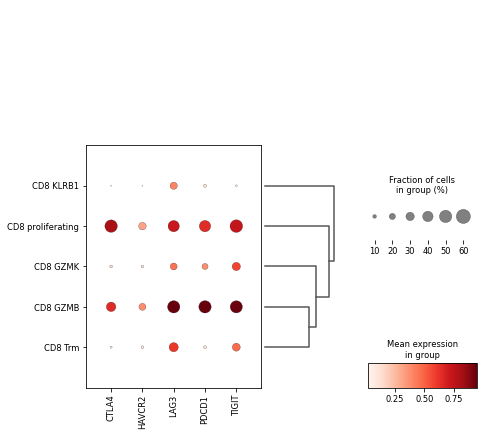

In [24]:
figure=plt.figure(figsize=(7,7))
ax1=figure.add_subplot(111)
#cytotocity_marker=['PRF1', 'IFNG', 'GNLY', 'NKG7', 'GZMK','GZMA', 'CST7','TNFSF10']
sc.tl.dendrogram(combined_T_CD8, groupby="T_cell_further_subtype2")
sc.pl.dotplot(combined_T_CD8,exhausted_marker, 'T_cell_further_subtype2', dendrogram=True,ax=ax1)
figure.savefig("TCR_analysis/all_celltype_exhausted.svg")




In [25]:
%pwd

'/OceanStor100D/home/sunyidi_lab/llwu/liver_project'